<img src="images/unep.png" alt="Drawing" style="width: 500px;"/>


# Forecasting Air Pollution in Beijing for United Nations Environment Programme (UNEP)

#### Author: Juana Tavera

## Organizational Objective

The city of Beijing, China is one of the most populous cities in the world with over 21.5 million residents. Due to its economic opportunities, entertainment options, and public commodities - people have flocked to city. Unfortunately Beijing has a mass air pollution problem. Air pollutants like particulate matter 10 (PM10) - particles in the air like dust, dirt, and soot, can result in a number of health impacts ranging from coughing and wheezing to asthma attacks and bronchitis to high blood pressure, heart attack, strokes, and premature death. Any level of PM10 is not good but keeping exposure to PM10 concentrations below 54.0 µg/m³ is the best way to prevent any short or long-term health effects from developing.

Therefore UNEP, has tasked me with forecasting air pollutant PM10 in Beijing, which averages over 100 µg/m³ to obtain a better understanding of what could happen to air quality as more and more cities become densely populated, as well as what can be done to remedy it.

## Data Understanding & Preparation

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
#reading in csv files 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

Chose Changping, Dongsi, Huairou, and Wanliu stations based on their proximity to the city center. As well as based on their population, which can be found in the table below:

<img src="images/beijing-districts.jpeg" alt="Districts" style="width: 500px;"/>

<table>
  <tr>
    <th>Station Name</th>
    <th>Population (2016)</th>
    <th>District</th>
  </tr>
  <tr>
    <td>Changping</td>
    <td>2.010 million</td>
    <td>Changping</td>
  </tr>
  <tr>
    <td>Dongsi</td>
    <td>878,000</td>
    <td>Dongsheng</td>
  </tr>
  <tr>
    <td>Huairou</td>
    <td>393,000</td>
    <td>Huairou</td>
  </tr>
  <tr>
    <td>Wanliu</td>
    <td>3.593 million</td>
    <td>Haidan</td>
  </tr>
</table>

In [3]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove features: 
#year, month, day, and hour
def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [4]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_huai = set_datetime(df_huai)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [5]:
#value_counts() on wd - wind direction 
print('Changping Station:')
display(df_chang['wd'].value_counts())
display(df_chang['wd'].nunique())

Changping Station:


NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

16

Each station has 16 unique `wd` (wind direction) values:
- N: north
- NW: north west
- NNW: north north west
- NE: north east
- NNE: north north east
---
- S: south 
- SW: south west
- SSW: south south west
- SE: south east
- SSE: south south east
---
- E: east
- ENE: east north east
- ESE: east south east
---
- W: west
- WNW: west north west
- WSW: west south west

In [6]:
#resampling to weekly average
df_chang_avg = df_chang.resample('W').mean()
df_dong_avg = df_dong.resample('W').mean()
df_huai_avg = df_huai.resample('W').mean()
df_wanl_avg = df_wanl.resample('W').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-03,36.5,31.986111,47.152778,31.732394,44.746479,868.957746,46.169014,1.915278,1019.633333,-16.231944,0.0000,1.475000
2013-03-10,156.5,119.226190,161.827381,51.397634,73.095972,1814.933333,78.023810,8.389286,1005.801786,-8.870833,0.0000,1.848810
2013-03-17,324.5,153.273810,166.125000,54.386905,79.154762,1756.652695,76.898810,6.120238,1011.125595,-4.038095,0.0125,1.366071
2013-03-24,492.5,52.351190,71.607143,11.017857,36.011905,827.285714,51.050825,4.301786,1006.700000,-6.970238,0.1250,2.010714
2013-03-31,660.5,99.500000,126.851190,24.535714,55.458333,1376.707483,39.350583,6.514286,1009.644048,-6.284524,0.0000,1.776190


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2013-03-03 to 2017-03-05
Freq: W-SUN
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      210 non-null    float64
 1   PM2.5   210 non-null    float64
 2   PM10    210 non-null    float64
 3   SO2     210 non-null    float64
 4   NO2     210 non-null    float64
 5   CO      210 non-null    float64
 6   O3      210 non-null    float64
 7   TEMP    210 non-null    float64
 8   PRES    210 non-null    float64
 9   DEWP    210 non-null    float64
 10  RAIN    210 non-null    float64
 11  WSPM    210 non-null    float64
dtypes: float64(12)
memory usage: 21.3 KB


None

Before resampling had 35,064 entries now with taking the weekly average have gone down to 201 observations.

In [7]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_huai_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#NO2
print('PM10 null values')   
for df in df_list:
    print(df['PM10'].isna().sum().sum())

Total null values:
0
17
0
7


PM10 null values
0
0
0
0


The total nulls for the station are all fairly low, the highest being 17 - Dongsi station located in the Dongsheng District (Beijing city center). 8% of the data is missing for Dongsi. The second highest is Wanliu station located in Haidian District with 7 total missing values. 3.3% of the data is missing.

The are no PM10 null values for all stations.

In [8]:
#.describe() on PM10 for all stations
print("Changping Station:")
display(df_chang_avg['PM10'].describe()) 

print("Dongsi Station:")
display(df_dong_avg['PM10'].describe())

print("Huairou Station:")
display(df_huai_avg['PM10'].describe())

print("Wanliu Station:")
display(df_wanl_avg['PM10'].describe())

Changping Station:


count    210.000000
mean      94.096797
std       41.124107
min       21.119760
25%       63.352679
50%       85.598214
75%      117.800948
max      258.297619
Name: PM10, dtype: float64

Dongsi Station:


count    210.000000
mean     109.898521
std       47.055767
min       27.726190
25%       75.769461
50%      101.544251
75%      135.678571
max      279.307229
Name: PM10, dtype: float64

Huairou Station:


count    210.000000
mean      91.952825
std       40.450438
min       21.413174
25%       61.697917
50%       83.073218
75%      114.203247
max      273.300000
Name: PM10, dtype: float64

Wanliu Station:


count    210.000000
mean     110.165681
std       45.452116
min       25.994012
25%       73.209375
50%      102.906250
75%      137.296380
max      258.101190
Name: PM10, dtype: float64

The station with the highest median is the Wanliu station with 102.91 and the one with the lowest is the Huairou Station at 83.03. The highest max is Dongsi station is 279.31 and the lowest is Wanliu Station at 258.10. 

Wanliu Station for the lowest max is surprising since I expected Huairou which is a more rural area and sparsely populated area to be the lowest. Also the Wanliu station had the highest median value for PM10 (μg/m3). 

----

## Exploratory Data Analysis

### TEMP

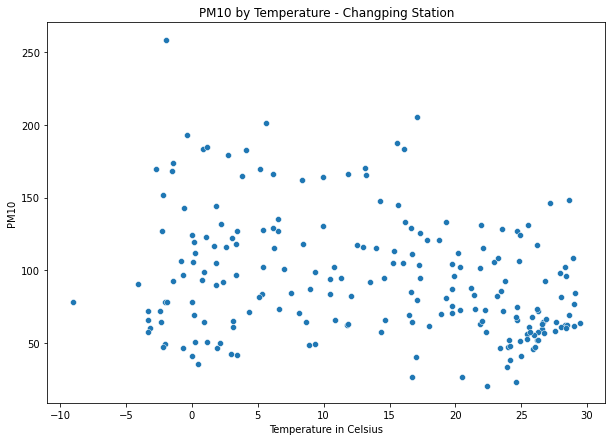

In [9]:
#realtionship between temperature and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Changping Station');

There is not a signficant pattern between PM10 and temperature other than the rise in temperature the PM10 concentration readings are clustered. 

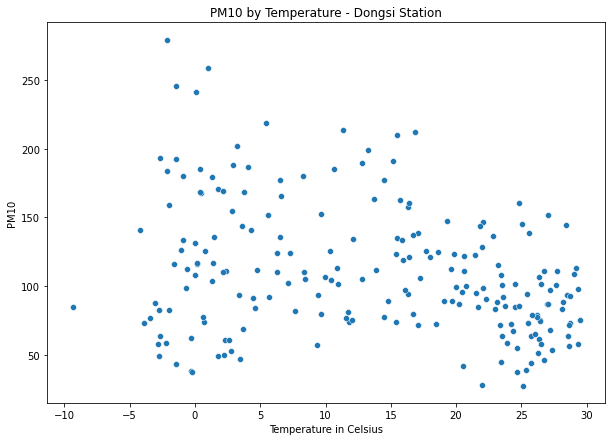

In [10]:
#temperature and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Dongsi Station');

This chart follows the same pattern or lack thereof as Changping with it being more spread out with colder temperature then being more clustered with higher temperatures.

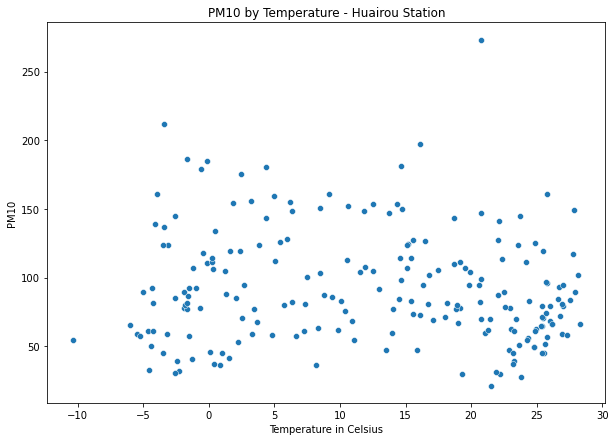

In [11]:
#temperature and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Huairou Station');

This chart is similar to the ones before with being more clusters around higher temperatures; which could mean that higher temperatures are more prone to have any PM10 reading.

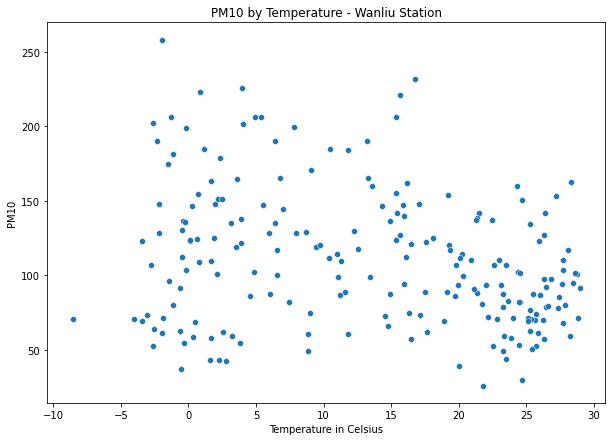

In [12]:
#temperature and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Wanliu Station');

This chart is the same as the ones above it; although it is more spread out than the Huairou station when it comes to lower temperatures.

### PRES

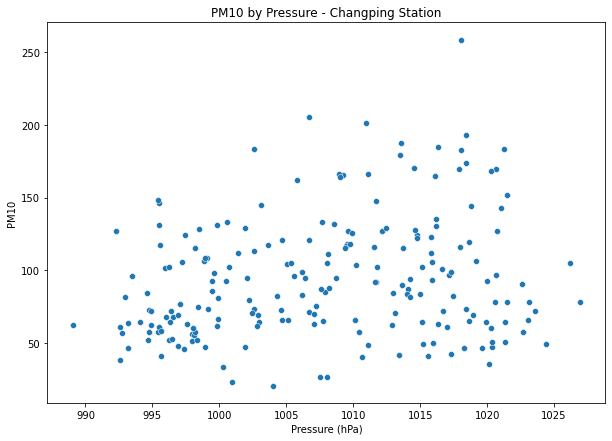

In [13]:
#relationship between pressure and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Changping Station');

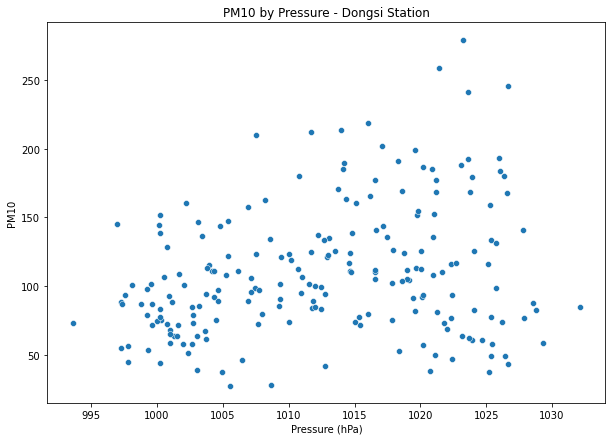

In [14]:
#pressure and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Dongsi Station');

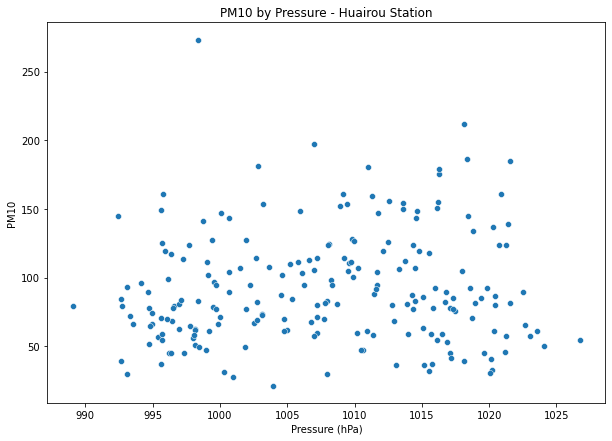

In [15]:
#pressure and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Huairou Station');

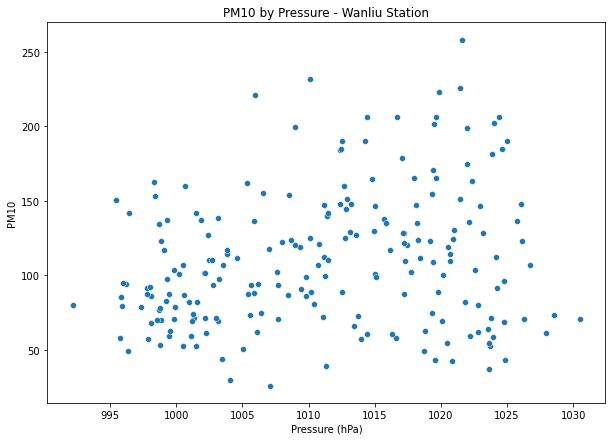

In [16]:
#pressure and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Wanliu Station');

For the scatterplots for the `PRES` feature can see they have similar charts; however there is not discernible patter to be found. Can see that Huairou has overall lower PM10 values (except for that one outlier) which makes sense since it is located in the more rural district of the same name compared to the other stations located closer to the city center. 

### DEWP

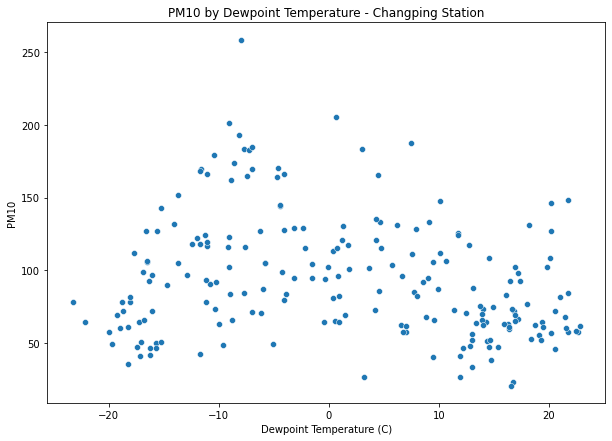

In [17]:
#relationship between dew point temperature and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Changping Station');

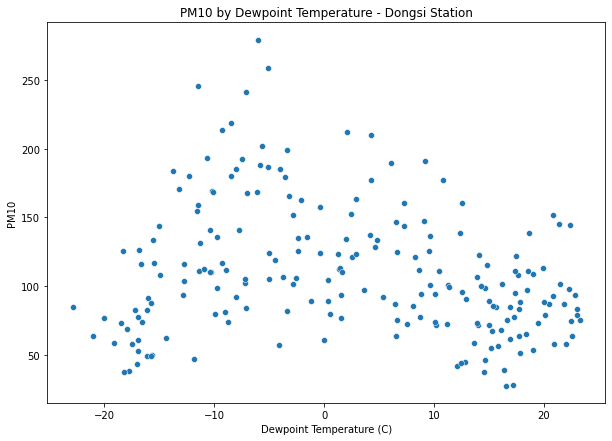

In [18]:
#DEWP and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Dongsi Station');

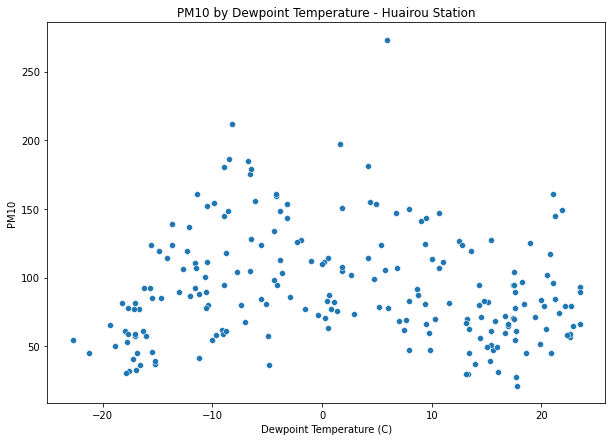

In [19]:
#DEWP and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Huairou Station');

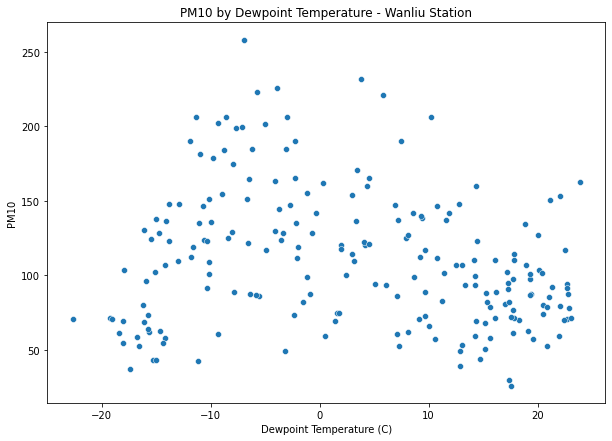

In [20]:
#DEWP and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Wanliu Station');

Dewpoint temperature in celsius does not seem to have any relationship with the amount of PM10. All of the points are very scattered and do not have a direction. This is true for all stations.

### RAIN

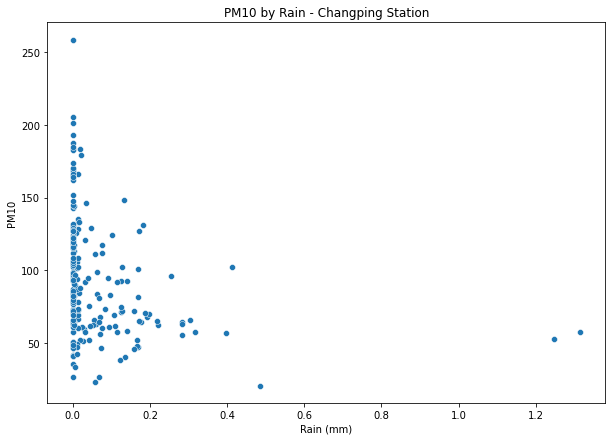

In [21]:
#relationship between precipitation and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Changping Station');

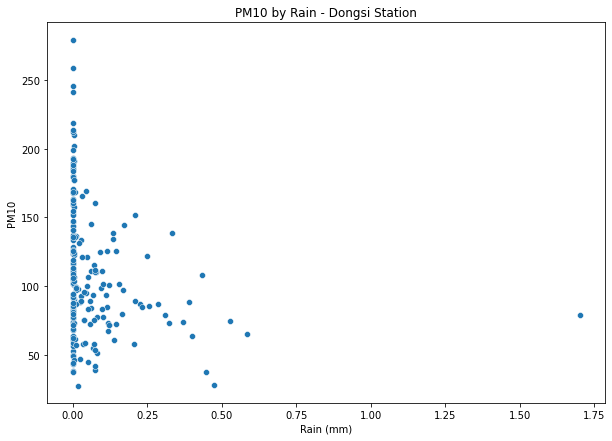

In [22]:
#RAIN and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Dongsi Station');

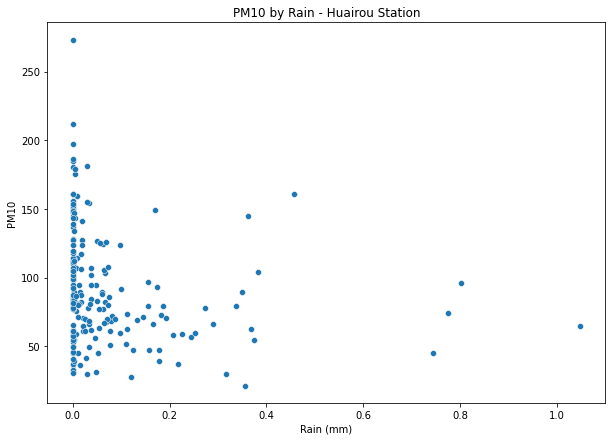

In [23]:
#RAIN and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Huairou Station');

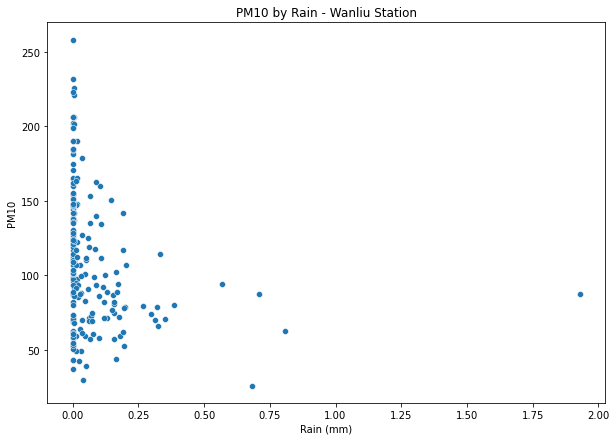

In [24]:
#RAIN and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Wanliu Station');

None of the station's graphs gives any unique insights since most of the values of `RAIN` are 0. Can see that Huairou get more average weekly rain compared to the other districts but there is no discernable relationship.

### WSPM

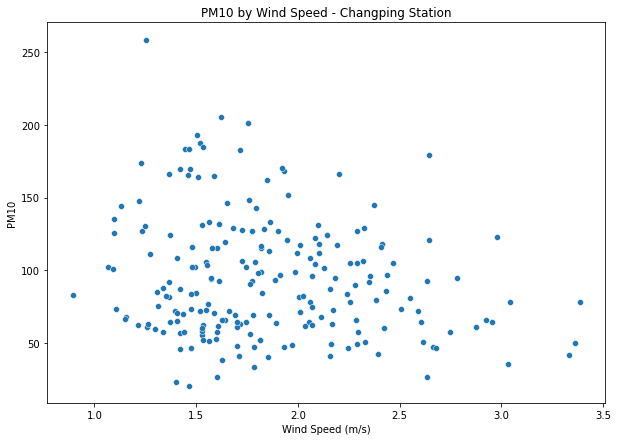

In [25]:
# relationship between wind speed and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Changping Station');

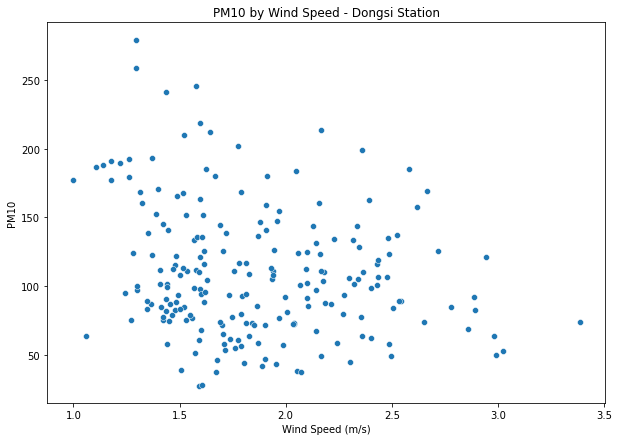

In [26]:
#WSPM and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Dongsi Station');

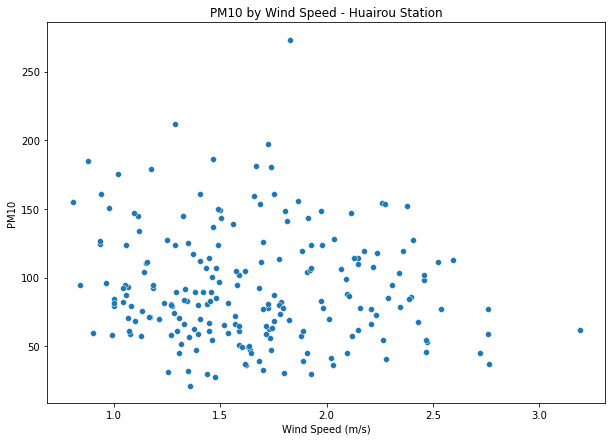

In [27]:
#WSPM and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Huairou Station');

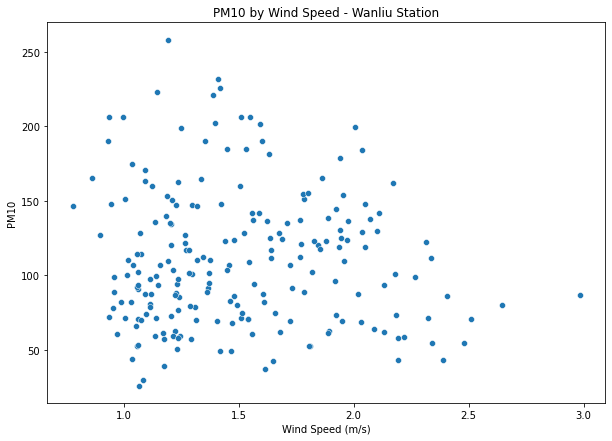

In [28]:
#WSPM and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Wanliu Station');

Once again no real discernable pattern/relationship between the amount of PM10 and the wind speed. However, the bulk of the observations seem to be between 1.0 and 1.5 for each station.

## Correlation Heatmap

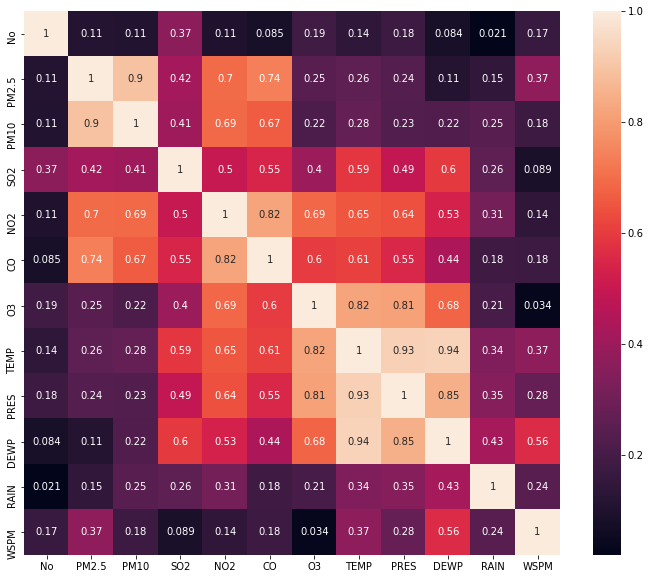

In [29]:
#Changping 
plt.figure(figsize=(12,10))
sns.heatmap(df_chang_avg.corr().abs(), annot=True)
plt.show()

From the Changping Station can see that PM10 has a high correlation with the other air pollutants the highest being PM2.5 (which make sense). But can further explore the relationship with feature `CO` and `NO2` which correlation value 0.67 and 0.69 respectively. 

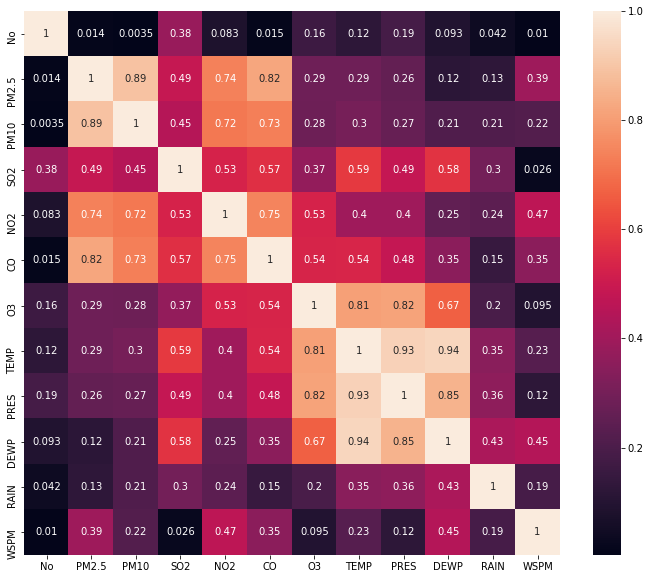

In [30]:
#Dongsi 
plt.figure(figsize=(12,10))
sns.heatmap(df_dong_avg.corr().abs(), annot=True)
plt.show()

For Dongsi can see it has the highest correlation after PM2.5 is with air pollutants `CO` and `NO2` - 0.73 and 0.72 respectively.

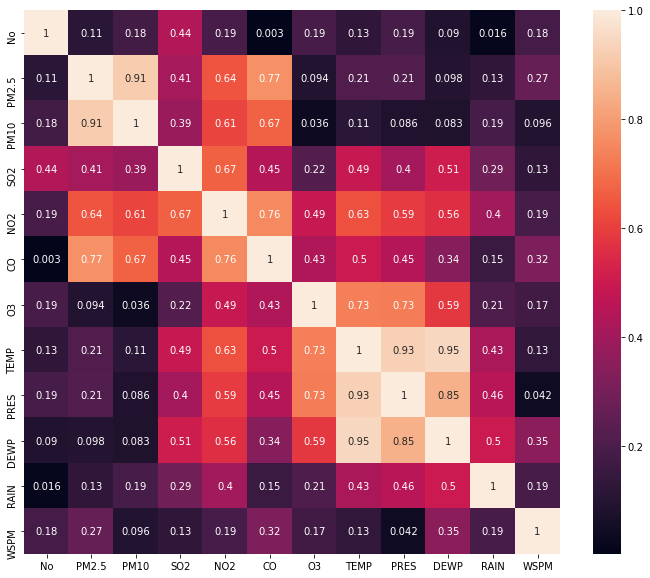

In [31]:
#Huairou 
plt.figure(figsize=(12,10))
sns.heatmap(df_huai_avg.corr().abs(), annot=True)
plt.show()

For Huairou the highest correlation after PM2.5 are once again with air pollutants `CO` and `NO2` - 0.67 and 0.61 respectively.

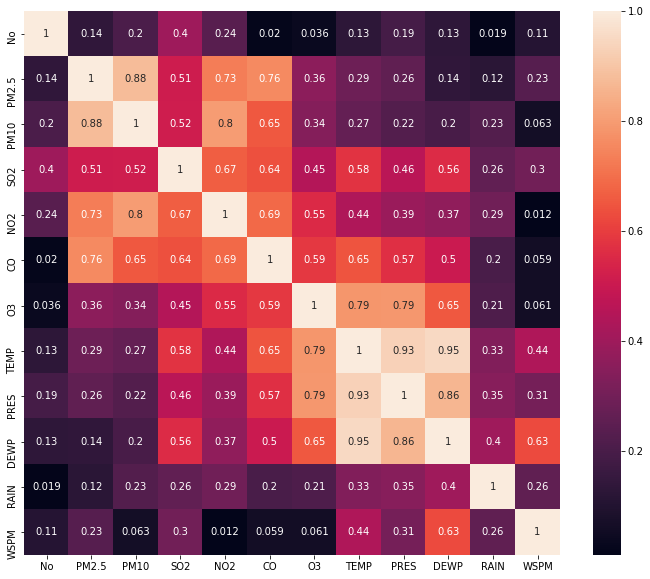

In [32]:
#Wanliu 
plt.figure(figsize=(12,10))
sns.heatmap(df_wanl_avg.corr().abs(), annot=True)
plt.show()

For Wanliu the highest correlation after PM2.5 are once again with air pollutants `CO` and `NO2` - 0.65 and 0.8 respectively. NO2 is highly correlated with PM10; worth looking into what human actions increase this pollutant, as well as further exploring the industries in the districts.

### NO2

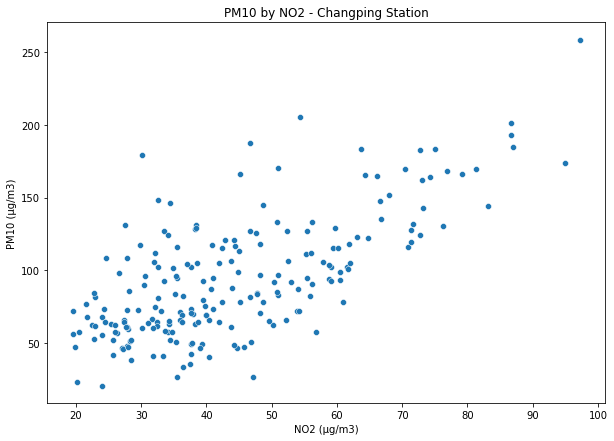

In [33]:
#relationship between nitrogen dioxide and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('PM10 (μg/m3)')
plt.title('PM10 by NO2 - Changping Station');

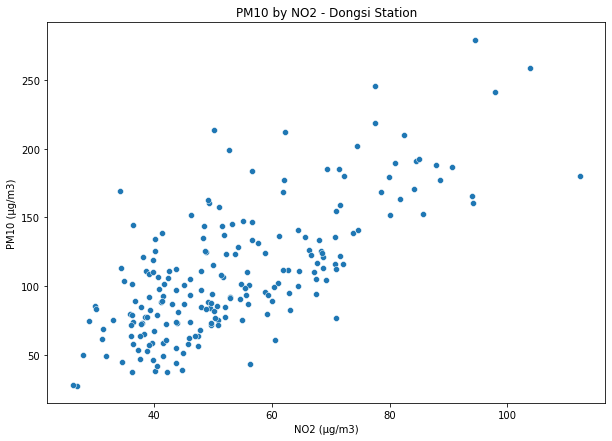

In [34]:
#NO2 and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('PM10 (μg/m3)')
plt.title('PM10 by NO2 - Dongsi Station');

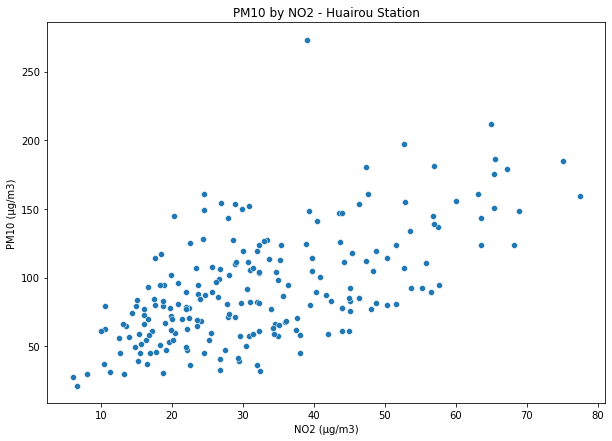

In [35]:
#NO2 and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('PM10 (μg/m3)')
plt.title('PM10 by NO2 - Huairou Station');

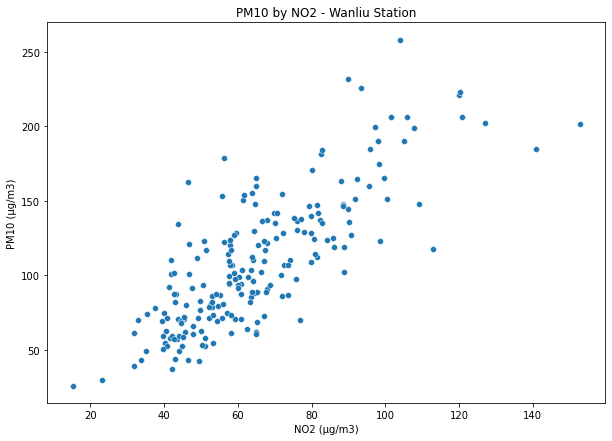

In [36]:
#NO2 and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('PM10 (μg/m3)')
plt.title('PM10 by NO2 - Wanliu Station');

For all the stations can see that target variable PM10 and NO2 have positive linear relationship; so as one increases the other increases as well. Wanliu and Dongsi stations have a stronger relationship with PM10 than Huairou and Changping.

## Distribution of PM10

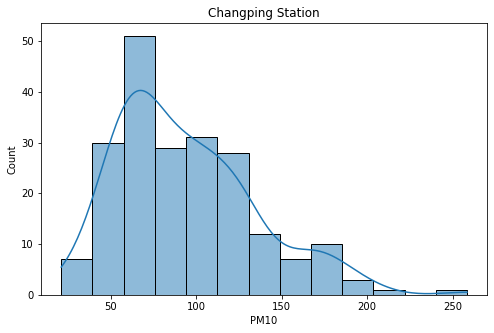

In [37]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='PM10', kde=True)
plt.title("Changping Station");

Changping has a right (positive) skewed distribution with the bulk of PM10 being with the range of 50 to 150; trailing off to 250.

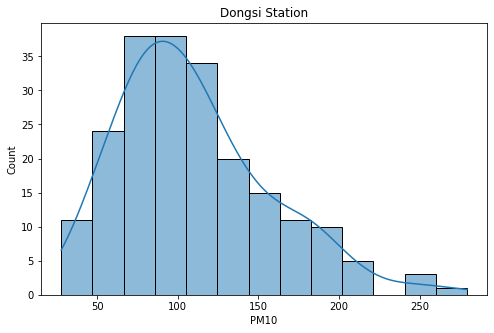

In [38]:
#histogram for Dongsi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_dong_avg, x='PM10', kde=True)
plt.title("Dongsi Station");

Dongsi has a right (positive) skewed distribtuion with the bulk of PM10 being within the range of 50 to 200; trailing off to 250.

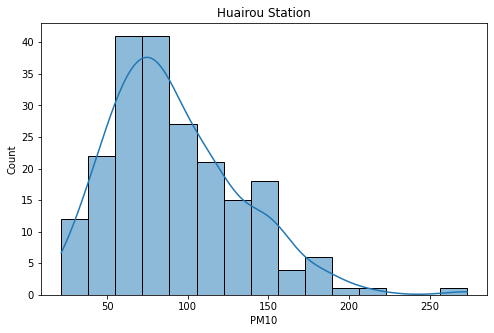

In [39]:
#histogram for Huairou Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_huai_avg, x='PM10', kde=True)
plt.title("Huairou Station");

Huairou has a right (positive) skewed distribution with the bulk of PM10 being within range 50 to 150; trailing off to 250.

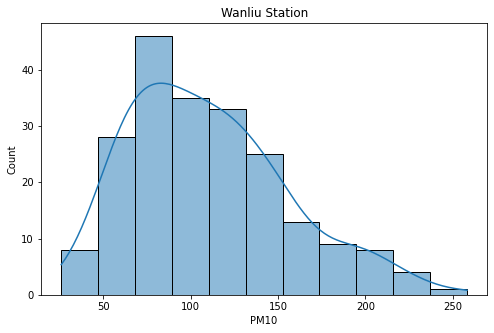

In [40]:
#histogram for Wanliu Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_wanl_avg, x='PM10', kde=True)
plt.title("Wanliu Station");

Wanliu has a right (positive) skewed distribution with the bulk of PM10 being within range to 50 to 150; trailing off to 200.

## Line Plot of PM10

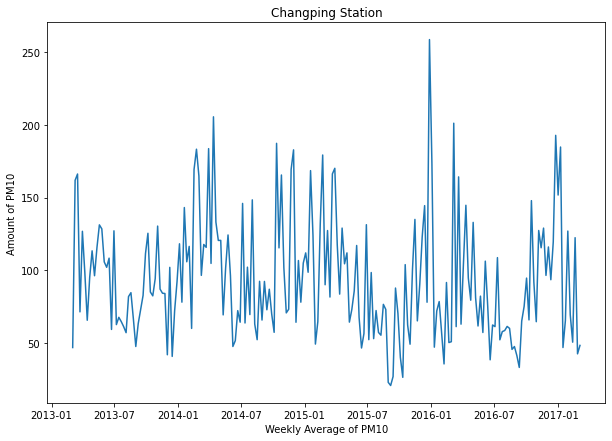

In [41]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Changping Station");

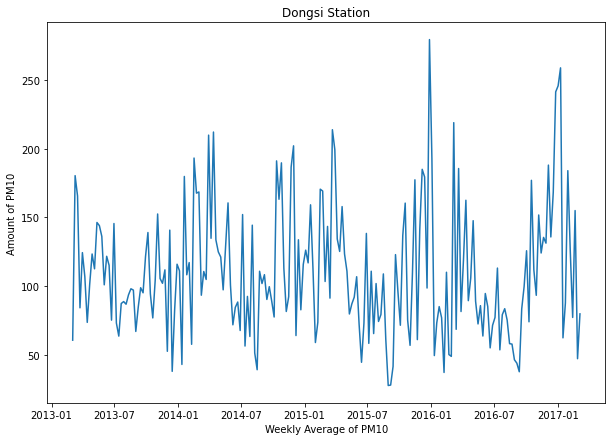

In [42]:
#lineplot for Dongsi Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_dong_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Dongsi Station");

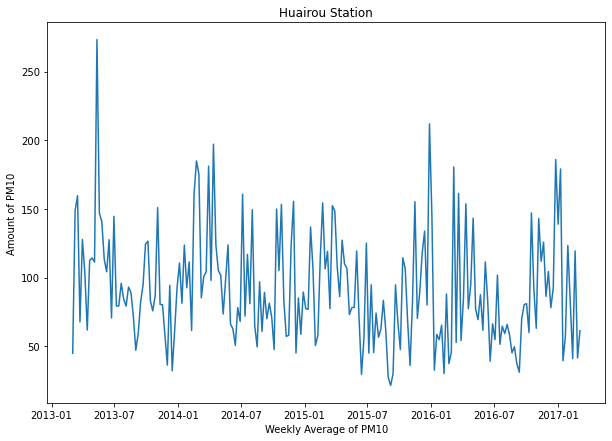

In [43]:
#lineplot for Huairou Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_huai_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Huairou Station");

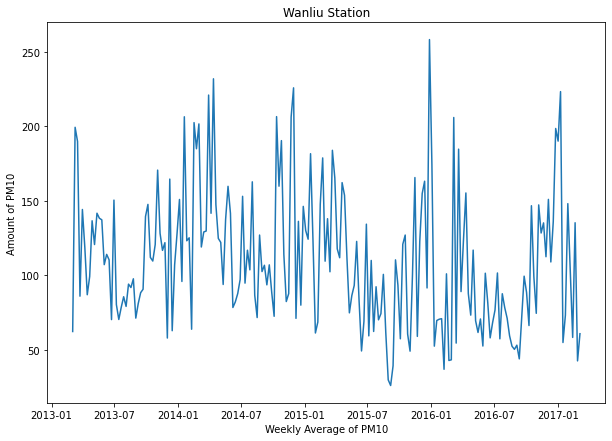

In [44]:
#lineplot for Wanliu Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_wanl_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Wanliu Station");

- There are no obvious patterns in the PM10 time series plot.
- There does not appear to be a general trend increasing or decreasing.
- There may be a seasonal variation where there are some spikes at the beginning to the mid of the year. 

## Decomposition

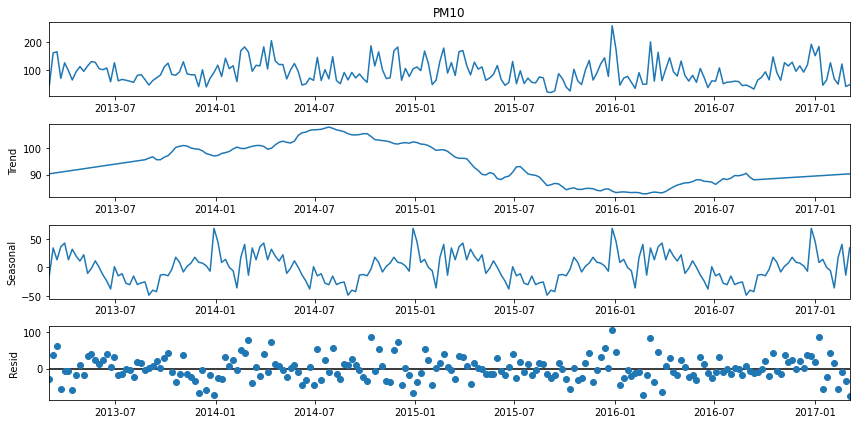

In [45]:
plt.rcParams['figure.figsize'] = (12, 6)

#Changping Station
decomposition_chang = sm.tsa.seasonal_decompose(df_chang_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_chang.plot()

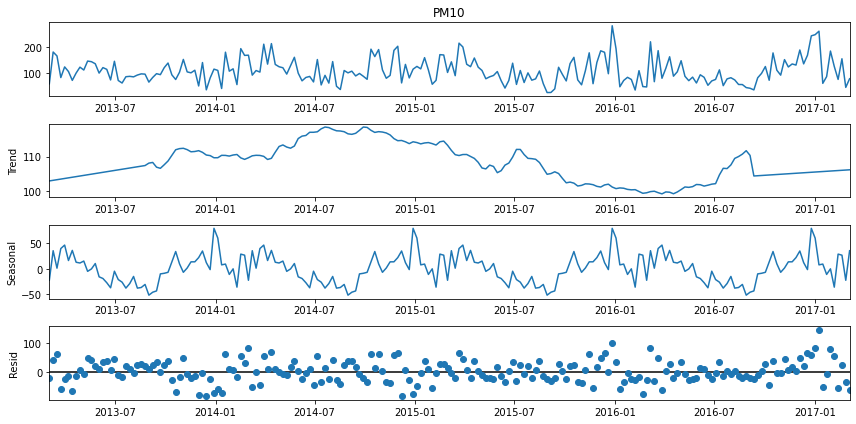

In [46]:
#Dongsi Station
decomposition_dong = sm.tsa.seasonal_decompose(df_dong_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_dong.plot()

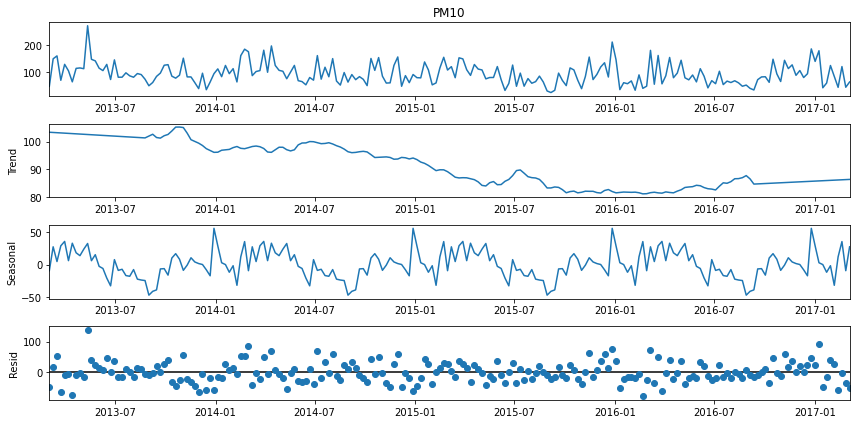

In [47]:
#Huairou Station
decomposition_huai = sm.tsa.seasonal_decompose(df_huai_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_huai.plot()

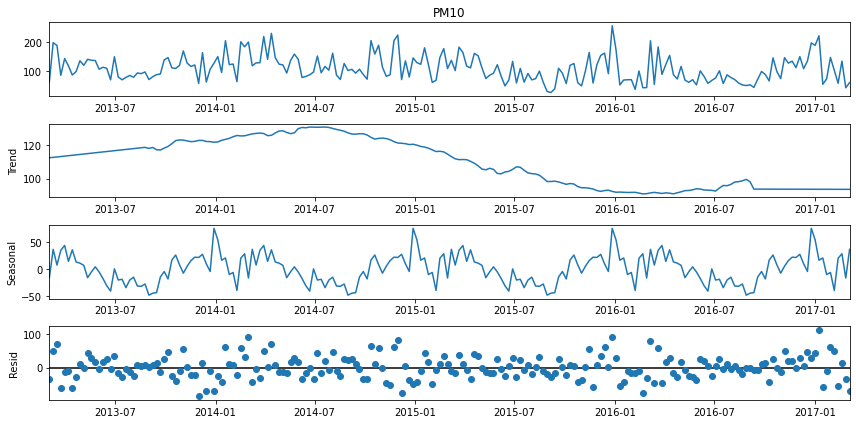

In [48]:
#Wanliu Station
decomposition_wanl = sm.tsa.seasonal_decompose(df_wanl_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_wanl.plot()

- The Observed plot shows the average weekly PM10 values.
- The Trend plot indicates that there is an overall decreasing trend for the stations.
- The Seasonal plot identifies repeating patterns that reach their lowest value about 60% of the way through each year. The maximum values are near the start of each year.
- The Residual plot reflects the remaining noise in the dataset after removing the other variation types. There are no patterns present.

-----

## Data Preprocessing

In [49]:
#necessary imports 
from statsmodels.tsa.stattools import adfuller

### Train Test Split

In [50]:
#find the index which allows us to split off 20% of the data
pct_train = 0.80


#Changping Station
cutoff_c = round(len(df_chang_avg) * pct_train)

#Dongsi Station
cutoff_d = round(len(df_dong_avg) * pct_train)

#Huairou Station
cutoff_h = round(len(df_huai_avg) * pct_train)

#Wanliu Station
cutoff_w = round(len(df_wanl_avg) * pct_train)

#checking how many values are in the trainset
cutoff_w

168

In [51]:
#Changping Station 
train_chang, test_chang = df_chang_avg[:cutoff_c], df_chang_avg[cutoff_c:]

#Dongsi Station
train_dong, test_dong = df_dong_avg[:cutoff_d], df_dong_avg[cutoff_d:]

#Huairou Station
train_huai, test_huai = df_huai_avg[:cutoff_h], df_huai_avg[cutoff_h:]

#Wanliu Station
train_wanl, test_wanl = df_wanl_avg[:cutoff_w], df_wanl_avg[cutoff_w:]

In [52]:
#checking nulls for all stations
train_list = [train_chang, train_dong, train_huai, train_wanl]

print('Total null values')   
for df in train_list:
    print(df.isna().sum().sum())

Total null values
0
17
0
7


In [53]:
#imputing the missing values with the median
#Changping
train_chang = train_chang.fillna(train_chang.median())

#Dongsi
train_dong = train_dong.fillna(train_dong.median())

#Huairou
train_huai = train_huai.fillna(train_huai.median())

#Wanliu
train_wanl = train_wanl.fillna(train_wanl.median())

### Checking for Stationarity

In [54]:
#Changping 
#autolag set to AIC to minimize it
chang_dft = adfuller(train_chang['PM10'], autolag='AIC')
output_chang = pd.Series(chang_dft[0:4], index=['test statistic', 'pvalue', 
                                                'number of lags used', 'number of observations'])
output_chang

test statistic             -2.952427
pvalue                      0.039582
number of lags used        11.000000
number of observations    156.000000
dtype: float64

In [55]:
#Dongsi
dong_dft = adfuller(train_dong['PM10'], autolag='AIC')
output_dong = pd.Series(dong_dft[0:4], index=['test statistic', 'pvalue', 
                                              'number of lags used', 'number of observations'])
output_dong

test statistic             -4.616759
pvalue                      0.000120
number of lags used         3.000000
number of observations    164.000000
dtype: float64

In [56]:
#Huairou
huai_dft = adfuller(train_huai['PM10'], autolag='AIC')
output_huai = pd.Series(huai_dft[0:4], index=['test statistic', 'pvalue', 
                                              'number of lags used', 'number of observations'])
output_huai

test statistic           -1.071993e+01
pvalue                    3.169995e-19
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

In [57]:
#Wanliu
wanl_dft = adfuller(train_wanl['PM10'], autolag='AIC')
output_wanl = pd.Series(wanl_dft[0:4], index=['test statistic', 'pvalue', 
                                              'number of lags used', 'number of observations'])
output_wanl

test statistic             -4.409844
pvalue                      0.000285
number of lags used         3.000000
number of observations    164.000000
dtype: float64

All of the stations have a p-value that is equalt to less than 0.05. The series are stationary; therefore can proceed with the modeling without having to do any differencing.

---

## Time Series Modeling

In [58]:
#!pip install pmdarima ##this is for SARIMA model grid search uncomment if need to

In [59]:
#pip install --upgrade numpy #upgrade numpy afterwards pmdarima if need to

In [60]:
#importing necessary libraries
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

In [61]:
#functions to find the root mean squared error
#train data
def find_rmse(model, train_data=train_chang):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data.PM10, y_hat))

#test data
def find_rmse_test(model, test_data=test_chang):
    y_hat = model.predict(start=test_data.PM10.index[0], end=test_data.PM10.index[-1])
    return np.sqrt(mean_squared_error(test_data.PM10, y_hat))

Root Mean Squared Error (RMSE) was chosen as an evaluation metric because I want to minimize error in the forecasting; get as close to the actual value as possible.

## Changping Station
### Baseline Model - Shift by 1 Week

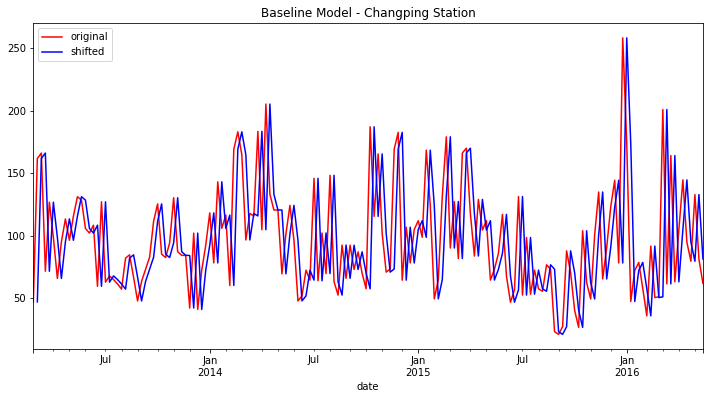

In [62]:
base_chang = train_chang['PM10'].shift(1)

fig, ax = plt.subplots()

train_chang.PM10.plot(ax=ax, c='r', label='original')
base_chang.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Changping Station')
ax.legend();

In [63]:
base_rmse = np.sqrt(mean_squared_error(train_chang.PM10[1:], base_chang.dropna()))
base_rmse

51.70829535648783

### First Simple Model - Autoregressive Model (AR)

In [64]:
ar_chang = ARIMA(train_chang['PM10'], order=(1, 0, 0)).fit()
ar_chang.predict(typ='levels')

date
2013-03-03     96.425002
2013-03-10     86.003450
2013-03-17    110.258237
2013-03-24    111.167225
2013-03-31     91.175785
                 ...    
2016-04-17    106.633616
2016-04-24     96.094294
2016-05-01     92.868915
2016-05-08    104.150522
2016-05-15     93.240459
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [65]:
ar_chang.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -859.190
Date:                Wed, 16 Nov 2022   AIC                           1724.380
Time:                        11:05:57   BIC                           1733.752
Sample:                    03-03-2013   HQIC                          1728.184
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4250      4.655     20.715      0.000      87.302     105.548
ar.L1          0.2115      0.075      2.826      0.005       0.065       0.358
sigma2      1616.0296    170.853      9.459      0.000    1281.163    1950.896
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                33.44
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.95
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Moving Average (MA) Model 

In [66]:
ma_chang = ARIMA(train_chang['PM10'], order=(0, 0, 1)).fit()
ma_chang.predict(typ='levels')

date
2013-03-03     96.388313
2013-03-10     88.204354
2013-03-17    108.973701
2013-03-24    106.165858
2013-03-31     90.475807
                 ...    
2016-04-17    104.170959
2016-04-24     94.795586
2016-05-01     93.790636
2016-05-08    103.088035
2016-05-15     92.672449
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [67]:
ma_chang.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -859.974
Date:                Wed, 16 Nov 2022   AIC                           1725.949
Time:                        11:05:58   BIC                           1735.320
Sample:                    03-03-2013   HQIC                          1729.752
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3883      4.334     22.239      0.000      87.894     104.883
ma.L1          0.1711      0.073      2.345      0.019       0.028       0.314
sigma2      1635.7881    175.361      9.328      0.000    1292.086    1979.490
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                32.55
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
print(f"Baseline Model: {base_rmse}")

print("\n")

print("AR Model:")
print(f"Train set RMSE: {find_rmse(ar_chang)}")
print(f"Test set RMSE: {find_rmse_test(ar_chang)}")

print("\n")

print("MA Model:")
print(f"Train set RMSE: {find_rmse(ma_chang)}")
print(f"Test set RMSE: {find_rmse_test(ma_chang)}")

Baseline Model: 51.70829535648783


AR Model:
Train set RMSE: 40.25968519229775
Test set RMSE: 40.648842576887404


MA Model:
Train set RMSE: 40.447359153402985
Test set RMSE: 40.68171774754363


The AR Model and MA Model performed signficantly better than the Baseline Model - by 11 μg/m3. Can see that there is no overfitting happening with these simple models since the test and train are very close to one another. 

The AIC Score for AR and MA are 1,724.380 and 1,725.949 respectively. The AR Model performed slightly better but not by much. The AIC score estimates the relative quality of statistical models for a given set of data and takes into account the complexity of a model along with how well a model fits the data.

### PACF & ACF Charts

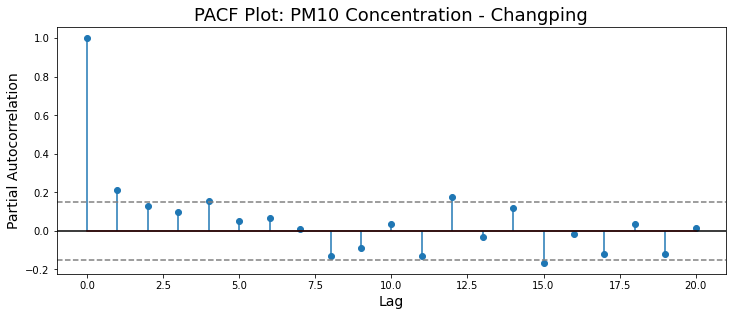

In [69]:
lag_pacf_c = pacf(train_chang.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_pacf_c)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_chang)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_chang)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration - Changping', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14);

Possible p values: 1 or 4.

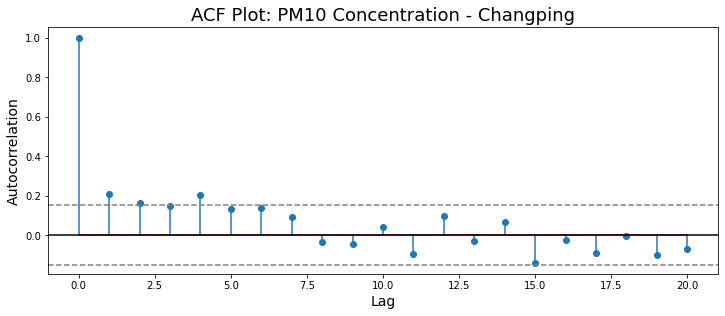

In [70]:
#ACF chart
lag_acf_c = acf(train_chang.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf_c)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_chang)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_chang)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration - Changping', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14);

Possible values of q to try would be 1, 2, or 4.

### ARIMA Models - Tuning Based on ACF & PACF Charts

In [71]:
arima_chang1 = ARIMA(train_chang['PM10'], order=(1, 0, 1)).fit()
arima_chang1.predict(typ='levels')

date
2013-03-03     96.424182
2013-03-10     85.828426
2013-03-17    101.619226
2013-03-24    111.856903
2013-03-31    102.642474
                 ...    
2016-04-17    105.646655
2016-04-24    102.395663
2016-05-01     97.741756
2016-05-08    103.205825
2016-05-15     98.571858
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [72]:
arima_chang1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -855.882
Date:                Wed, 16 Nov 2022   AIC                           1719.763
Time:                        11:06:06   BIC                           1732.259
Sample:                    03-03-2013   HQIC                          1724.835
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4242      7.000     13.775      0.000      82.704     110.144
ar.L1          0.8361      0.132      6.358      0.000       0.578       1.094
ma.L1         -0.6748      0.170     -3.970      0.000      -1.008      -0.342
sigma2      1556.6939    164.251      9.478      0.000    1234.769    1878.619
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                34.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.97
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
#second ARIMA model
arima_chang2 = ARIMA(train_chang['PM10'], order=(4, 0, 2)).fit()
arima_chang2.predict(typ='levels')

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


date
2013-03-03     96.561322
2013-03-10     86.194306
2013-03-17    102.806320
2013-03-24    111.505483
2013-03-31     97.578264
                 ...    
2016-04-17    103.775381
2016-04-24     76.535404
2016-05-01     62.642118
2016-05-08     74.542212
2016-05-15     92.254754
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [74]:
arima_chang2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -851.082
Date:                Wed, 16 Nov 2022   AIC                           1718.165
Time:                        11:06:06   BIC                           1743.156
Sample:                    03-03-2013   HQIC                          1728.307
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.5613      6.003     16.086      0.000      84.796     108.327
ar.L1          1.5883      0.085     18.593      0.000       1.421       1.756
ar.L2         -1.0441      0.148     -7.035      0.000      -1.335      -0.753
ar.L3          0.0796      0.128      0.620      0.535      -0.172       0.331
ar.L4          0.0966      0.069      1.410      0.159      -0.038       0.231
ma.L1         -1.5020      1.134     -1.325      0.185      -3.724       0.720
ma.L2          0.9991      1.515      0.660      0.510      -1.970       3.968
sigma2      1428.5182   2159.762      0.661      0.508   -2804.538    5661.575
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                30.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             0.87
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_chang1)}")
print(f"Test set RMSE: {find_rmse_test(arima_chang1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_chang2)}")
print(f"Test set RMSE: {find_rmse_test(arima_chang2)}")

ARIMA Model 1: 
Train set RMSE: 39.49065586261966
Test set RMSE: 40.37340339052237


ARIMA Model 2: 
Train set RMSE: 38.304283614795864
Test set RMSE: 41.998256383769146


The ARIMA Models had a slight improvement over the AR and MA Models with a train of 39.39 and 38.30 respectively. However the first ARIMA model performed slightly better in the testset of both the AR and MA models. The second ARIMA model had a worst RMSE score of all the other models; however it did perform the best according the AIC score. 

The AIC score for first and second ARIMA models are 1,719.763 and 1,718.165 respectively. Therefore so far the best performing model is the second ARIMA model.

### SARIMA Model

In [76]:
#grid search for the SARIMA model with minimizes AIC score
SARIMA_c = pm.auto_arima(train_chang.PM10, 
                         start_p=0, 
                         d=1, 
                         start_q=0, 
                         max_p=6, 
                         max_d=6, 
                         max_q=6, 
                         start_P=0, 
                         D=1, 
                         start_Q=0, 
                         max_P=6, 
                         max_D=6, 
                         max_Q=6, 
                         seasonal=True, #adding seasonality
                         m=52, #seasonality periods - 52 weeks
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True, 
                         stepwise=True)  

SARIMA_c.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1324.343, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1274.448, Time=7.06 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=14.97 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1298.102, Time=0.35 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1275.001, Time=25.61 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=1274.998, Time=11.87 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=16.63 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=1277.006, Time=32.03 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1302.288, Time=3.82 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1268.726, Time=4.14 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1291.582, Time=0.50 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=1268.731, Time=18.23 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=10.99 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=12.46 sec
 ARIMA(2,1,0)(2,1,1)[52]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -618.232
Date:                             Wed, 16 Nov 2022   AIC                           1242.464
Time:                                     11:16:39   BIC                           1250.699
Sample:                                 03-03-2013   HQIC                          1245.807
                                      - 05-15-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9500      0.037    -25.381      0.000      -1.023      -0.877
ar.S.L52      -0.5054      0.103     -4.917      0.000      -0.707      -0.304
sigma2      2347.6739    285.875      8.212      0.000    1787.369    2907.978
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                13.15
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.62
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
#RMSE - SARIMA
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_chang.PM10, SARIMA_c.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_chang.PM10, 
                                                        SARIMA_c.predict(n_periods=test_chang.shape[0]))))

Training RMSE: 49.64
Testing RMSE: 41.88


Although this model performed worse compared to the other models in terms of RMSE -  a 41.88 μg/m3 in the testset and 49.64 μg/m3 in the trainset. This is not a concern for overfitting. 

Its AIC score signficanlty improved with a 1,242.464, almost a 500 point difference! This will be the final model. 

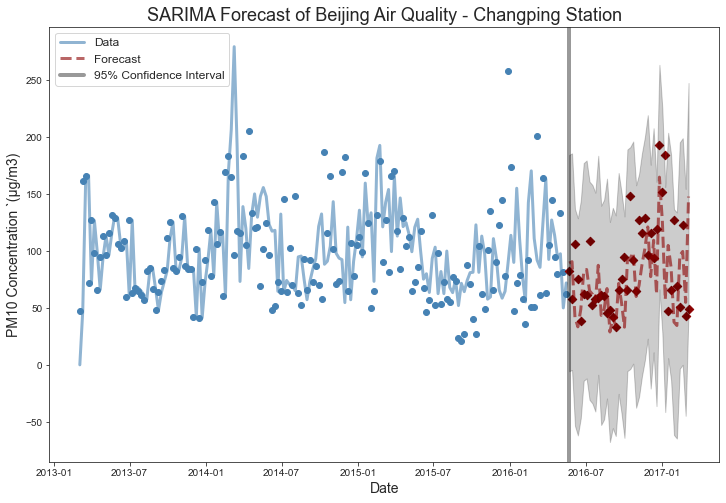

In [78]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_chang.index, train_chang.PM10, color='steelblue', marker='o')
plt.plot(train_chang.index, SARIMA_c.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_c, ci_test_c = SARIMA_c.predict(n_periods=test_chang.shape[0], return_conf_int=True)
ci_lower_c = pd.Series(ci_test_c[:, 0], index=test_chang.index)
ci_upper_c = pd.Series(ci_test_c[:, 1], index=test_chang.index)
plt.scatter(test_chang.index, test_chang.PM10, color='darkred', marker='D')
plt.plot(test_chang.index, SARIMA_c.predict(n_periods=test_chang.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Changping Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(μg/m3)', fontsize=14)
plt.axvline(x=df_chang_avg.PM10.index[cutoff_c], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_c.index, ci_lower_c, ci_upper_c, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

The model performed fairly well for the Changping Station, all the observations are within the 95% confidence interval; meaning that 95% of the time the true population mean will fall within that shaded grey area and and a 5% chance that it will not. The standard deviation for PM10 in Changping was 41.12 μg/m3 with the RMSE for SARIMA being 41.88 μg/m3 which is only slightly above it. 

## Dongsi Station

### Baseline Model - Shift by 1 Week 

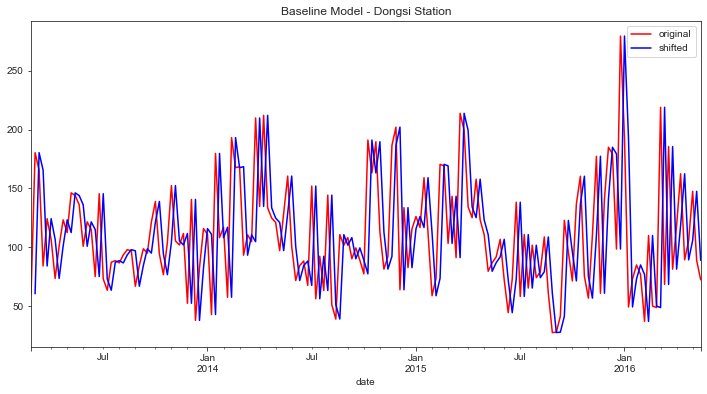

In [79]:
base_dong = train_dong['PM10'].shift(1)

fig, ax = plt.subplots()

train_dong.PM10.plot(ax=ax, c='r', label='original')
base_dong.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Dongsi Station')
ax.legend();

In [80]:
#RMSE for baseline model
base_rmse_d = np.sqrt(mean_squared_error(train_dong.PM10[1:], base_dong.dropna()))
base_rmse_d

57.83759493083038

### AR Model

In [81]:
ar_dong = ARIMA(train_dong['PM10'], order=(1, 0, 0)).fit()
ar_dong.predict(typ='levels')

date
2013-03-03    110.309072
2013-03-10    102.421214
2013-03-17    121.441761
2013-03-24    119.089523
2013-03-31    106.163511
                 ...    
2016-04-17    118.596534
2016-04-24    106.989121
2016-05-01    109.601907
2016-05-08    116.236225
2016-05-15    106.920276
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [82]:
ar_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -874.233
Date:                Wed, 16 Nov 2022   AIC                           1754.467
Time:                        11:18:14   BIC                           1763.839
Sample:                    03-03-2013   HQIC                          1758.271
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3091      4.552     24.233      0.000     101.387     119.231
ar.L1          0.1589      0.071      2.240      0.025       0.020       0.298
sigma2      1935.4285    210.041      9.215      0.000    1523.757    2347.100
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                18.92
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [83]:
ma_dong = ARIMA(train_dong['PM10'], order=(0, 0, 1)).fit()
ma_dong.predict(typ='levels')

date
2013-03-03    110.272781
2013-03-10    103.485250
2013-03-17    120.994307
2013-03-24    116.490156
2013-03-31    105.770942
                 ...    
2016-04-17    117.277579
2016-04-24    106.385873
2016-05-01    110.199371
2016-05-08    115.491529
2016-05-15    106.574645
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [84]:
ma_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -874.517
Date:                Wed, 16 Nov 2022   AIC                           1755.034
Time:                        11:18:16   BIC                           1764.406
Sample:                    03-03-2013   HQIC                          1758.838
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.2728      4.383     25.161      0.000     101.683     118.863
ma.L1          0.1395      0.071      1.973      0.048       0.001       0.278
sigma2      1945.0898    213.011      9.131      0.000    1527.597    2362.583
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                18.98
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
print(f"Baseline Model: {base_rmse_d}")

print("\n")

print("AR Model:")
print(f"Train set RMSE: {find_rmse(ar_dong)}")
print(f"Test set RMSE: {find_rmse_test(ar_dong)}")

print("\n")

print("MA Model:")
print(f"Train set RMSE: {find_rmse(ma_dong)}")
print(f"Test set RMSE: {find_rmse_test(ma_dong)}")

Baseline Model: 57.83759493083038


AR Model:
Train set RMSE: 42.59748017244609
Test set RMSE: 46.53114635213947


MA Model:
Train set RMSE: 42.72132435742991
Test set RMSE: 46.55228874843594


The Baseline Model RMSE was 57.84 therefore the AR Model and MA Model signficanlty improved with a RMSE testset score of 46.53 and 46.55 respectively. The difference in RMSE scores in the train and test sets are not alarming; however there is some slight underfitting.

The AIC score for AR and MA are 1,754.467 and 1,755.034 respectively; therefore the model that performed better was the AR model.

### PACF & ACF Charts

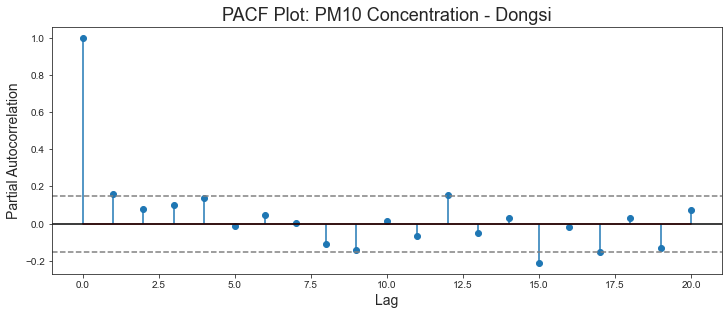

In [86]:
lag_pacf_d = pacf(train_dong.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_pacf_d)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_dong)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_dong)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration - Dongsi', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14);

Possible p-values are 1 since that is the only one slighlty above the line which is worth trying. 

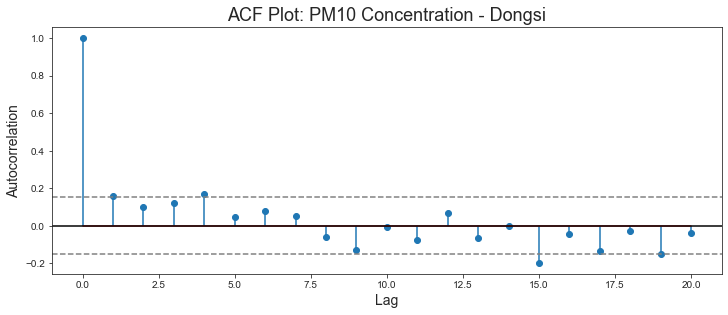

In [87]:
lag_acf_d = acf(train_dong.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf_d)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_dong)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_dong)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration - Dongsi', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14);

Possible q values: 1 or 4.

### ARIMA Model

In [88]:
arima_dong1 = ARIMA(train_dong['PM10'], order=(1, 0, 1)).fit()
arima_dong1.predict(typ='levels')

date
2013-03-03    110.225746
2013-03-10    102.104162
2013-03-17    115.444416
2013-03-24    121.300401
2013-03-31    113.698202
                 ...    
2016-04-17    118.603186
2016-04-24    112.750007
2016-05-01    111.244765
2016-05-08    115.952130
2016-05-15    110.998288
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [89]:
arima_dong1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -872.530
Date:                Wed, 16 Nov 2022   AIC                           1753.060
Time:                        11:18:20   BIC                           1765.556
Sample:                    03-03-2013   HQIC                          1758.131
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.2257      6.054     18.206      0.000      98.359     122.092
ar.L1          0.7744      0.210      3.694      0.000       0.364       1.185
ma.L1         -0.6386      0.254     -2.515      0.012      -1.136      -0.141
sigma2      1898.6635    218.611      8.685      0.000    1470.194    2327.133
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.93
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.74
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
#second ARIMA model
arima_dong2 = ARIMA(train_dong['PM10'], order=(1, 0, 4)).fit()
arima_dong2.predict(typ='levels')

date
2013-03-03    110.311059
2013-03-10    102.156397
2013-03-17    117.962843
2013-03-24    116.358260
2013-03-31    104.634902
                 ...    
2016-04-17    132.214393
2016-04-24    107.783030
2016-05-01    110.286038
2016-05-08    120.134129
2016-05-15    103.010363
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [91]:
arima_dong2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -870.528
Date:                Wed, 16 Nov 2022   AIC                           1755.057
Time:                        11:18:29   BIC                           1776.924
Sample:                    03-03-2013   HQIC                          1763.932
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3111      6.357     17.352      0.000      97.851     122.771
ar.L1          0.4734      0.238      1.989      0.047       0.007       0.940
ma.L1         -0.3593      0.246     -1.459      0.144      -0.842       0.123
ma.L2         -0.0058      0.072     -0.081      0.936      -0.147       0.135
ma.L3          0.0732      0.084      0.876      0.381      -0.091       0.237
ma.L4          0.1878      0.100      1.871      0.061      -0.009       0.385
sigma2      1851.7444    233.898      7.917      0.000    1393.314    2310.175
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.76
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.73
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_dong1)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_dong2)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong2)}")

ARIMA Model 1: 
Train set RMSE: 41.99635676037825
Test set RMSE: 46.205707504468634


ARIMA Model 2: 
Train set RMSE: 41.69964535249765
Test set RMSE: 46.280912431043845


Compared to the AR and MA Model the ARIMA Models performed slighlty better with the RMSE of the testset at 46.21 and 46.28 for the first and second ARIMAs. The first ARIMA model and the second ARIMA model had an AIC score of 1,753.060 and 1,755.057. The second ARIMA model actually performed worse the AR and MA models. 

Based on the AIC score the model that has performed the best is the first ARIMA model by a point. 

### SARIMA Model 

In [93]:
#grid search for the SARIMA model with minimizes AIC score
SARIMA_d = pm.auto_arima(train_dong.PM10, 
                         start_p=0, 
                         d=1, 
                         start_q=0, 
                         max_p=6, 
                         max_d=6, 
                         max_q=6, 
                         start_P=0, 
                         D=1, 
                         start_Q=0, 
                         max_P=6, 
                         max_D=6, 
                         max_Q=6, 
                         seasonal=True, 
                         m=52, 
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True, 
                         stepwise=True)  

SARIMA_d.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1341.441, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1302.476, Time=2.73 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=7.50 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1319.484, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=13.87 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=13.87 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=8.51 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=24.67 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1326.477, Time=1.89 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1295.767, Time=3.55 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1310.856, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=18.98 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=17.44 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=12.18 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -634.703
Date:                            Wed, 16 Nov 2022   AIC                           1279.405
Time:                                    11:23:23   BIC                           1293.130
Sample:                                03-03-2013   HQIC                          1284.976
                                     - 05-15-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6774      0.087     -7.776      0.000      -0.848      -0.507
ar.L2         -0.5008      0.094     -5.344      0.000      -0.685      -0.317
ar.L3         -0.3935      0.088     -4.481      0.000      -0.566      -0.221
ar.S.L52      -0.4914      0.106     -4.620      0.000      -0.700      -0.283
sigma2      3196.1309    422.008      7.574      0.000    2369.011    4023.251
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.94   Prob(JB):                         0.25
Heteroskedasticity (H):               1.43   Skew:                             0.35
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
#RMSE SARIMA
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_dong.PM10, SARIMA_d.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_dong.PM10, 
                                                        SARIMA_d.predict(n_periods=test_dong.shape[0]))))

Training RMSE: 57.94
Testing RMSE: 54.61


Although the RMSE was 54.61 μg/m3 compared to the ~46 μg/m3 from the previous models, the AIC score for the SARIMA model on Dongsi station was 1,279.405. This is once again almost 500 points diference! This is the final model.

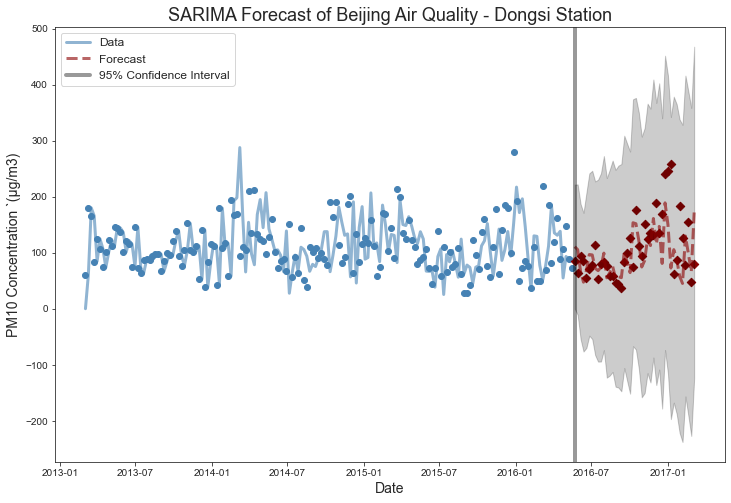

In [95]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_dong.index, train_dong.PM10, color='steelblue', marker='o')
plt.plot(train_dong.index, SARIMA_d.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_d, ci_test_d = SARIMA_d.predict(n_periods=test_dong.shape[0], return_conf_int=True)
ci_lower_d = pd.Series(ci_test_d[:, 0], index=test_dong.index)
ci_upper_d = pd.Series(ci_test_d[:, 1], index=test_dong.index)
plt.scatter(test_dong.index, test_dong.PM10, color='darkred', marker='D')
plt.plot(test_dong.index, SARIMA_d.predict(n_periods=test_dong.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Dongsi Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(μg/m3)', fontsize=14)
plt.axvline(x=df_dong_avg.PM10.index[cutoff_d], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_d.index, ci_lower_d, ci_upper_d, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

The model performed fairly well for the Dongsi station, all the observations are within the 95% confidence interval; meaning that 95% of the time the true population mean will fall within the shaded grey area and and a 5% chance that it will not. The standard deviation for PM10 in Dongsi was 47.06 μg/m3 with the RMSE for SARIMA being 54.6 μg/m3. The RMSE was 7.54 μg/m3 above it.

## Huairou Station 
### Baseline Model - Shift by 1 Week

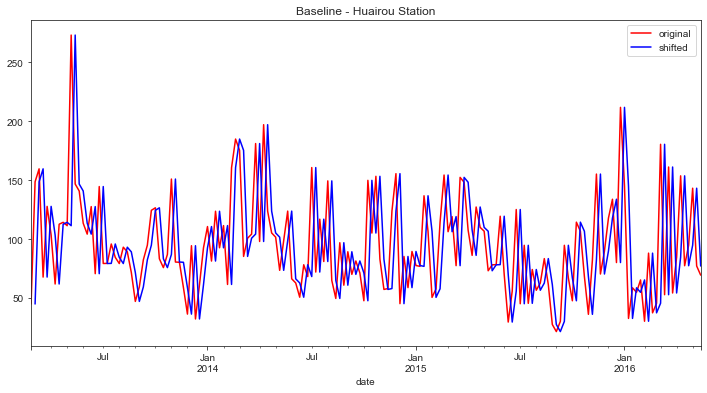

In [96]:
base_huai = train_huai['PM10'].shift(1)

fig, ax = plt.subplots()

train_huai.PM10.plot(ax=ax, c='r', label='original')
base_huai.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Huairou Station')
ax.legend();

In [97]:
#RMSE for the Baseline Model
base_rmse_h = np.sqrt(mean_squared_error(train_huai.PM10[1:], base_huai.dropna()))
base_rmse_h

52.022378171678746

### AR Model

In [98]:
ar_huai = ARIMA(train_huai['PM10'], order=(1, 0, 0)).fit()
ar_huai.predict(typ='levels')

date
2013-03-03     94.175717
2013-03-10     85.154606
2013-03-17    104.135187
2013-03-24    106.147042
2013-03-31     89.336770
                 ...    
2016-04-17    105.060623
2016-04-24     91.100127
2016-05-01     94.290073
2016-05-08    103.139552
2016-05-15     91.058107
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [99]:
ar_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -858.125
Date:                Wed, 16 Nov 2022   AIC                           1722.250
Time:                        11:24:07   BIC                           1731.622
Sample:                    03-03-2013   HQIC                          1726.053
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1757      4.399     21.409      0.000      85.554     102.798
ar.L1          0.1828      0.082      2.225      0.026       0.022       0.344
sigma2      1599.8733    152.657     10.480      0.000    1300.670    1899.076
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                43.55
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.97
Prob(H) (two-sided):                  0.69   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [100]:
ma_huai = ARIMA(train_huai['PM10'], order=(0, 0, 1)).fit()
ma_huai.predict(typ='levels')

date
2013-03-03     94.239891
2013-03-10     87.037637
2013-03-17    103.416547
2013-03-24    102.619980
2013-03-31     89.037633
                 ...    
2016-04-17    103.146279
2016-04-24     90.396423
2016-05-01     94.896257
2016-05-08    101.438455
2016-05-15     90.616661
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [101]:
ma_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -858.685
Date:                Wed, 16 Nov 2022   AIC                           1723.370
Time:                        11:24:08   BIC                           1732.742
Sample:                    03-03-2013   HQIC                          1727.173
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2399      4.145     22.738      0.000      86.117     102.363
ma.L1          0.1490      0.081      1.837      0.066      -0.010       0.308
sigma2      1610.8670    153.464     10.497      0.000    1310.082    1911.652
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                43.58
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.97
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
print(f"Baseline Model: {base_rmse_h}")

print("\n")

print("AR Model: ")
print(f"Train set RMSE: {find_rmse(ar_huai)}")
print(f"Test set RMSE: {find_rmse_test(ar_huai)}")

print("\n")

print("MA Model: ")
print(f"Train set RMSE: {find_rmse(ma_huai)}")
print(f"Test set RMSE: {find_rmse_test(ma_huai)}")

Baseline Model: 52.022378171678746


AR Model: 
Train set RMSE: 40.60879766084787
Test set RMSE: 40.0992735218183


MA Model: 
Train set RMSE: 40.71933821177556
Test set RMSE: 40.13792380231361


The Baseline Model RMSE was 52.02 μg/m3. The AR and MA model signficantly improved from this with their RMSE values both ~40 μg/m3. The AIC score of the AR and MA model are 1,722.250 and 1,723.370, meaning that the AR model performed slightly better. 

### PACF & ACF Charts

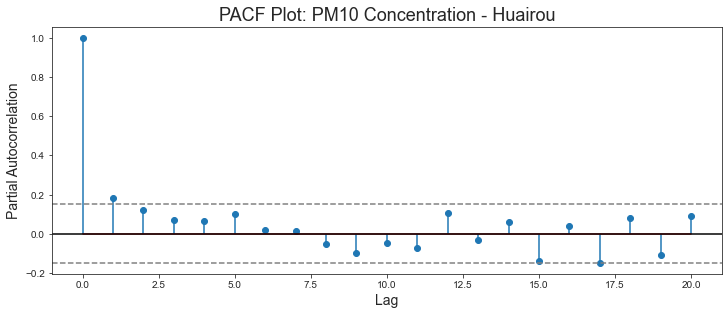

In [103]:
lag_pacf_h = pacf(train_huai.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_pacf_h)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_huai)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_huai)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration - Huairou', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14);

Possible p values: 1. 

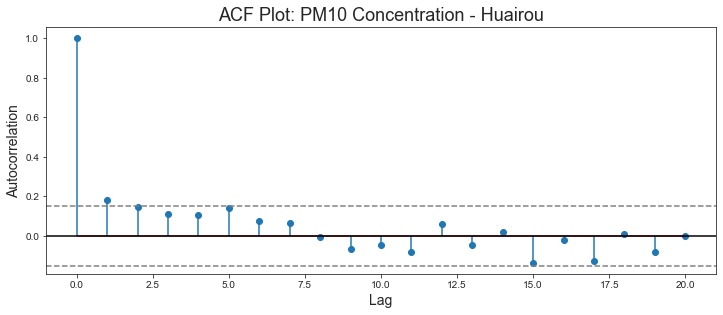

In [104]:
lag_acf_h = acf(train_huai.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf_h)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_huai)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_huai)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration - Huairou', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14);

Possible q values: 1 or 2.

### ARIMA Model

In [105]:
arima_huai1 = ARIMA(train_huai['PM10'], order=(1, 0, 1)).fit()
arima_huai1.predict(typ='levels')

date
2013-03-03     94.275830
2013-03-10     85.069592
2013-03-17     97.449501
2013-03-24    106.479653
2013-03-31     98.025850
                 ...    
2016-04-17    101.576288
2016-04-24     96.421353
2016-05-01     95.730484
2016-05-08    102.541813
2016-05-15     97.006094
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [106]:
arima_huai1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -855.972
Date:                Wed, 16 Nov 2022   AIC                           1719.943
Time:                        11:24:42   BIC                           1732.439
Sample:                    03-03-2013   HQIC                          1725.015
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2758      6.119     15.408      0.000      82.284     106.268
ar.L1          0.7912      0.186      4.260      0.000       0.427       1.155
ma.L1         -0.6413      0.233     -2.751      0.006      -1.098      -0.184
sigma2      1558.8654    152.526     10.220      0.000    1259.919    1857.812
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                45.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.01
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
#second ARIMA model
arima_huai2 = ARIMA(train_huai['PM10'], order=(1, 0, 2)).fit()
arima_huai2.predict(typ='levels')

date
2013-03-03     94.275573
2013-03-10     85.432748
2013-03-17     96.480273
2013-03-24    106.234893
2013-03-31     99.143295
                 ...    
2016-04-17    100.910273
2016-04-24     97.158360
2016-05-01     95.814671
2016-05-08    102.086782
2016-05-15     97.645350
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [108]:
arima_huai2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -855.953
Date:                Wed, 16 Nov 2022   AIC                           1721.906
Time:                        11:24:43   BIC                           1737.526
Sample:                    03-03-2013   HQIC                          1728.245
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2756      6.120     15.406      0.000      82.281     106.270
ar.L1          0.7812      0.226      3.462      0.001       0.339       1.223
ma.L1         -0.6409      0.248     -2.586      0.010      -1.127      -0.155
ma.L2          0.0162      0.099      0.164      0.869      -0.177       0.210
sigma2      1558.4896    152.197     10.240      0.000    1260.190    1856.790
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                45.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.01
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_huai1)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_huai2)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai2)}")

ARIMA Model 1: 
Train set RMSE: 40.113171145954446
Test set RMSE: 40.04433724837887


ARIMA Model 2: 
Train set RMSE: 40.10300436527795
Test set RMSE: 40.03518587050836


The first and second ARIMA model gave a RMSE score of 40.04 and and 40.3 respectively. These models performed slightly better than the AR and MA model albeit not by a significant amount. The trainset and testset for the ARIMA model have very similar scores so there is no worry about overfitting nor underfitting. 

The AIC score for the first and second ARIMA model are 1,719.943 and 1,721.906. According to the AIC score the ARIMA models performed slightly better than the AR and MA model. The first ARIMA model being the best performing model so far.

### SARIMA Model

In [110]:
#grid search for the SARIMA model with minimizes AIC score
SARIMA_h = pm.auto_arima(train_huai.PM10, 
                         start_p=0, 
                         d=1, 
                         start_q=0, 
                         max_p=6, 
                         max_d=6, 
                         max_q=6, 
                         start_P=0, 
                         D=1, 
                         start_Q=0, 
                         max_P=6, 
                         max_D=6, 
                         max_Q=6, 
                         seasonal=True,
                         m=52, 
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True, 
                         stepwise=True)  

SARIMA_h.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1325.878, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1283.631, Time=2.59 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=6.26 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1297.392, Time=0.40 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1284.980, Time=11.99 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=1284.979, Time=5.41 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=5.29 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=1286.981, Time=15.66 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1309.786, Time=1.98 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1277.561, Time=3.62 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1290.994, Time=0.58 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=1278.172, Time=17.04 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=1278.168, Time=11.41 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=6.14 sec
 ARIMA(2,1,0)(2,1,1)[52]      

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(5, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -625.036
Date:                              Wed, 16 Nov 2022   AIC                           1264.071
Time:                                      11:32:44   BIC                           1283.286
Sample:                                  03-03-2013   HQIC                          1271.870
                                       - 05-15-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7974      0.103     -7.774      0.000      -0.999      -0.596
ar.L2         -0.6282      0.119     -5.275      0.000      -0.862      -0.395
ar.L3         -0.5291      0.130     -4.074      0.000      -0.784      -0.275
ar.L4         -0.3566      0.146     -2.447      0.014      -0.642      -0.071
ar.L5         -0.1798      0.103     -1.753      0.080      -0.381       0.021
ma.S.L52      -0.5644      0.230     -2.451      0.014      -1.016      -0.113
sigma2      2603.2722    553.195      4.706      0.000    1519.030    3687.515
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.31
Prob(Q):                              0.96   Prob(JB):                         0.02
Heteroskedasticity (H):               0.84   Skew:                            -0.24
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
#RMSE for SARIMA
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_huai.PM10, SARIMA_h.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_huai.PM10, 
                                                        SARIMA_h.predict(n_periods=test_huai.shape[0]))))

Training RMSE: 54.75
Testing RMSE: 40.81


Compared to the testsets RMSE for all the other models; the SARIMA model performed around the same. However when looking at the trainset RMSE for SARIMA can see that there is some overfitting happening here. The AIC score for this model is 1,264.071, almost 500 point difference! This will be the final model for the Huairou station.

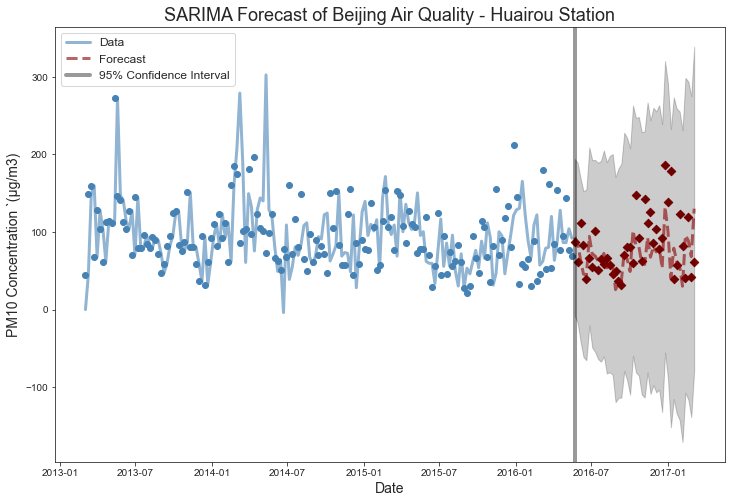

In [112]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_huai.index, train_huai.PM10, color='steelblue', marker='o')
plt.plot(train_huai.index, SARIMA_h.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_h, ci_test_h = SARIMA_h.predict(n_periods=test_huai.shape[0], return_conf_int=True)
ci_lower_h = pd.Series(ci_test_h[:, 0], index=test_huai.index)
ci_upper_h = pd.Series(ci_test_h[:, 1], index=test_huai.index)
plt.scatter(test_huai.index, test_huai.PM10, color='darkred', marker='D')
plt.plot(test_huai.index, SARIMA_h.predict(n_periods=test_huai.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Huairou Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(μg/m3)', fontsize=14)
plt.axvline(x=df_huai_avg.PM10.index[cutoff_h], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_h.index, ci_lower_h, ci_upper_h, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

The model performed fairly well for the Huairou station, all the observations are within the 95% confidence interval; meaning that 95% of the time the true population mean will fall within the shaded grey area and and a 5% chance that it will not. The standard deviation for PM10 in Huairou was 40.45 μg/m3 with the RMSE for SARIMA being 40.81 μg/m3 which is only slightly above it. 

## Wanliu Station
### Baseline Model - Shift by 1 Week

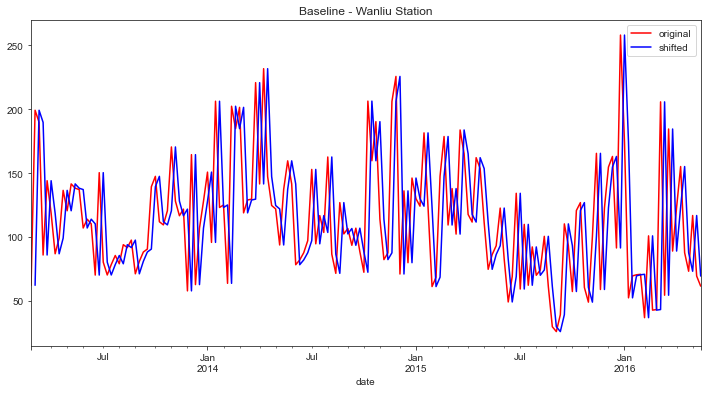

In [113]:
base_wanl = train_wanl['PM10'].shift(1)

fig, ax = plt.subplots()

train_wanl.PM10.plot(ax=ax, c='r', label='original')
base_wanl.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Wanliu Station')
ax.legend();

In [114]:
#RMSE for the Baseline Model
base_rmse_w = np.sqrt(mean_squared_error(train_wanl.PM10[1:], base_wanl.dropna()))
base_rmse_w

56.437962772264434

### AR Model

In [115]:
ar_wanl = ARIMA(train_wanl['PM10'], order=(1, 0, 0)).fit()
ar_wanl.predict(typ='levels')

date
2013-03-03    113.799964
2013-03-10    102.804850
2013-03-17    132.014207
2013-03-24    129.991923
2013-03-31    107.859733
                 ...    
2016-04-17    122.622140
2016-04-24    108.238770
2016-05-01    105.147709
2016-05-08    114.448944
2016-05-15    104.347412
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [116]:
ar_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -874.119
Date:                Wed, 16 Nov 2022   AIC                           1754.237
Time:                        11:33:38   BIC                           1763.609
Sample:                    03-03-2013   HQIC                          1758.041
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.8000      4.855     23.442      0.000     104.285     123.315
ar.L1          0.2132      0.072      2.959      0.003       0.072       0.354
sigma2      1931.6965    225.414      8.570      0.000    1489.893    2373.500
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                14.86
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.71
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [117]:
ma_wanl = ARIMA(train_wanl['PM10'], order=(0, 0, 1)).fit()
ma_wanl.predict(typ='levels')

date
2013-03-03    113.758809
2013-03-10    105.074842
2013-03-17    130.089823
2013-03-24    124.115252
2013-03-31    107.131487
                 ...    
2016-04-17    120.453610
2016-04-24    108.075691
2016-05-01    107.707332
2016-05-08    115.344786
2016-05-15    105.793938
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [118]:
ma_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -874.880
Date:                Wed, 16 Nov 2022   AIC                           1755.760
Time:                        11:33:39   BIC                           1765.132
Sample:                    03-03-2013   HQIC                          1759.564
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.7588      4.513     25.209      0.000     104.914     122.603
ma.L1          0.1736      0.073      2.377      0.017       0.030       0.317
sigma2      1953.3148    230.225      8.484      0.000    1502.082    2404.548
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.70
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
print(f"Baseline Model: {base_rmse_w}")

print("\n")

print("AR Model: ")
print(f"Train set RMSE: {find_rmse(ar_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ar_wanl)}")

print("\n")

print("MA Model: ")
print(f"Train set RMSE: {find_rmse(ma_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ma_wanl)}")

Baseline Model: 56.437962772264434


AR Model: 
Train set RMSE: 43.75531885797578
Test set RMSE: 48.42257204405568


MA Model: 
Train set RMSE: 43.894947592596495
Test set RMSE: 48.50459998722236


The AR and MA Models performed better than the Baseline Model which has an RMSE of 56 μg/m3. The AR and MA Models have a RMSE of 48.42 μg/m3 and 48.50 μg/m3 respectively. These scores are above their trainsets which implies there was some slight underfitting but nothing to be alarmed by. 

The AIC scores for AR and MA are 1,754.237 and 1,755.760 respectively, meaning that the AR model performed slighlty better. 

### PACF & ACF Charts

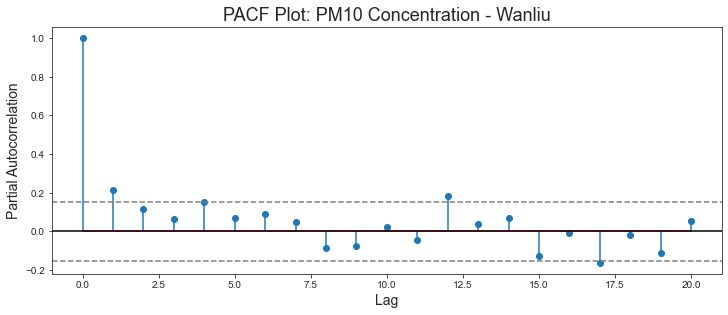

In [120]:
lag_pacf_w = pacf(train_wanl.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_pacf_w)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wanl)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wanl)), linestyle='--', color='gray')
plt.title('PACF Plot: PM10 Concentration - Wanliu', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14);

Possible p values 1 or 3.

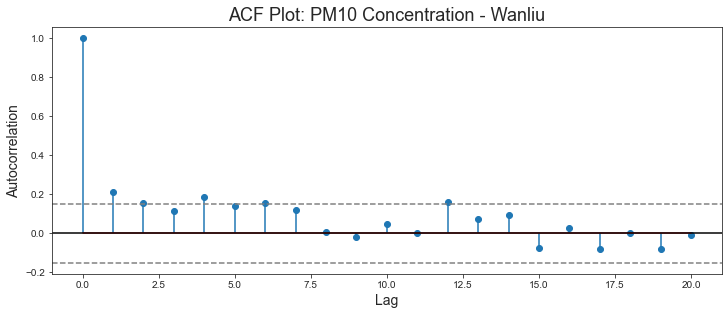

In [121]:
lag_acf_w = acf(train_wanl.PM10, nlags=20)

plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.stem(lag_acf_w)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_wanl)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_wanl)), linestyle='--', color='gray')
plt.title('ACF Plot: PM10 Concentration - Wanliu', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14);

Possible q values: 1, 2 or 4.

### ARIMA Models

In [122]:
arima_wanl1 = ARIMA(train_wanl['PM10'], order=(1, 0, 1)).fit()
arima_wanl1.predict(typ='levels')

date
2013-03-03    113.479125
2013-03-10    103.088759
2013-03-17    121.161815
2013-03-24    131.137721
2013-03-31    121.969205
                 ...    
2016-04-17    119.170505
2016-04-24    113.888818
2016-05-01    107.953431
2016-05-08    109.950118
2016-05-15    104.548126
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [123]:
arima_wanl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -871.004
Date:                Wed, 16 Nov 2022   AIC                           1750.008
Time:                        11:33:59   BIC                           1762.504
Sample:                    03-03-2013   HQIC                          1755.079
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.4791      7.767     14.610      0.000      98.256     128.702
ar.L1          0.8714      0.105      8.306      0.000       0.666       1.077
ma.L1         -0.7267      0.141     -5.146      0.000      -1.004      -0.450
sigma2      1863.5176    224.789      8.290      0.000    1422.940    2304.096
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.27
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.73
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
#second ARIMA model
arima_wanl2 = ARIMA(train_wanl['PM10'], order=(1, 0, 2)).fit()
arima_wanl2.predict(typ='levels')

date
2013-03-03    113.752951
2013-03-10    102.868312
2013-03-17    122.693768
2013-03-24    131.494660
2013-03-31    120.728432
                 ...    
2016-04-17    119.465690
2016-04-24    113.099659
2016-05-01    107.494875
2016-05-08    110.394688
2016-05-15    104.262664
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [125]:
arima_wanl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -870.985
Date:                Wed, 16 Nov 2022   AIC                           1751.970
Time:                        11:34:00   BIC                           1767.590
Sample:                    03-03-2013   HQIC                          1758.309
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.7530      7.797     14.589      0.000      98.470     129.035
ar.L1          0.8775      0.113      7.797      0.000       0.657       1.098
ma.L1         -0.7215      0.140     -5.140      0.000      -0.997      -0.446
ma.L2         -0.0169      0.079     -0.214      0.830      -0.171       0.138
sigma2      1863.7214    227.864      8.179      0.000    1417.116    2310.327
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.74
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_wanl1)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_wanl2)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl2)}")

ARIMA Model 1: 
Train set RMSE: 43.118961733700075
Test set RMSE: 46.34824393801379


ARIMA Model 2: 
Train set RMSE: 43.164217916399565
Test set RMSE: 46.473298231952064


The first and second ARIMA models both performed better with a RMSE of 46.34 μg/m3 and 46.47 μg/m3 respectively while the AR and MA Models had RMSE of ~48 μg/m3. The AIC score of the first and second ARIMA Models are 1,750.008 and 1,751.970 respectively. They performed better than the AR and MA models, so far the best performing model is the first ARIMA model.

### SARIMA Model

In [127]:
#grid search for the SARIMA model with minimizes AIC score
SARIMA_w = pm.auto_arima(train_wanl.PM10, 
                         start_p=0, 
                         d=1, 
                         start_q=0, 
                         max_p=6, 
                         max_d=6, 
                         max_q=6, 
                         start_P=0, 
                         D=1, 
                         start_Q=0, 
                         max_P=6, 
                         max_D=6, 
                         max_Q=6, 
                         seasonal=True, 
                         m=52, 
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True, 
                         stepwise=True)  

SARIMA_w.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1335.869, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1295.092, Time=2.83 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=5.34 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1316.004, Time=0.35 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1294.989, Time=13.69 sec
 ARIMA(1,1,0)(3,1,0)[52]             : AIC=inf, Time=65.94 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=21.99 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=7.28 sec
 ARIMA(1,1,0)(3,1,1)[52]             : AIC=inf, Time=109.91 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=1321.880, Time=11.34 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=17.42 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=1258.235, Time=21.00 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=1257.974, Time=7.53 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=1271.494, Time=1.01 sec
 ARIMA(1,1,1)(1,1,1)[52]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -625.024
Date:                             Wed, 16 Nov 2022   AIC                           1256.048
Time:                                     11:41:41   BIC                           1264.283
Sample:                                 03-03-2013   HQIC                          1259.391
                                      - 05-15-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9355      0.040    -23.220      0.000      -1.014      -0.857
ar.S.L52      -0.4759      0.102     -4.670      0.000      -0.676      -0.276
sigma2      2695.5287    382.825      7.041      0.000    1945.205    3445.853
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.68   Prob(JB):                         0.15
Heteroskedasticity (H):               1.41   Skew:                             0.40
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
#RMSE SARIMA
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_wanl.PM10, SARIMA_w.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_wanl.PM10, 
                                                        SARIMA_w.predict(n_periods=test_wanl.shape[0]))))

Training RMSE: 55.48
Testing RMSE: 51.19


Compared to the testsets RMSE for all the other models; the SARIMA model performed worse than the others at 51.19 μg/m3. There is no worry for overfitting nor underfitting here. The AIC score for this model is 1,256.048, almost 500 point difference! This will be the final model for the Wanliu station.

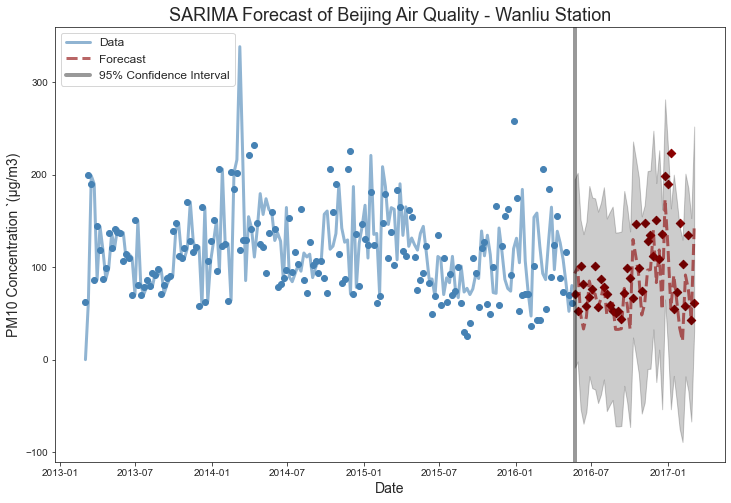

In [129]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_wanl.index, train_wanl.PM10, color='steelblue', marker='o')
plt.plot(train_wanl.index, SARIMA_w.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_w, ci_test_w = SARIMA_w.predict(n_periods=test_wanl.shape[0], return_conf_int=True)
ci_lower_w = pd.Series(ci_test_w[:, 0], index=test_wanl.index)
ci_upper_w = pd.Series(ci_test_w[:, 1], index=test_wanl.index)
plt.scatter(test_wanl.index, test_wanl.PM10, color='darkred', marker='D')
plt.plot(test_wanl.index, SARIMA_w.predict(n_periods=test_wanl.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Wanliu Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(μg/m3)', fontsize=14)
plt.axvline(x=df_wanl_avg.PM10.index[cutoff_w], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_w.index, ci_lower_w, ci_upper_w, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

The model performed fairly well for the Wanliu station, most of the observations are within the 95% confidence interval except for one at `2017-01`. The standard deviation for PM10 in Wanliu was 45.45 μg/m3 with the RMSE for SARIMA being 51.19 μg/m3 which is 5.74 μg/m3 above it. 

---

## Conclusion & Reccomendations

In conclusion found that a SARIMA Model gave the best forcasting in terms of AIC score (model performance). The RMSE was better for the ARIMA model; however its AIC score was above 1,700 compared to around the 1,200 for SARIMA. Also found that there is a very strong positive correlation between the feature NO2 and target variable PM10. Finally, the air pollution is on a overall decline in Beijing. 

The recommendations I would give to the UNEP are:
1. SARIMA models provide the best forecasting.
2. Implement a similar program for districts in Beijing such as the Toxics Release Inventory Program here in the United States - where industrial and federal facilities report their pollution prevention activities will encourage industries that contribute heavily to air pollution in becoming more sustainable and environmentally friendly.
3. The UNEP should team up with big tech industries, like Xiaomi who reside in the Haidian district, and plan to take necessary steps towards carbon neutrality through the way they manufacture their products. 


#### Disclaimer: This is a HYPOTHETICAL objective. The United Nations Enviornment Programme DID NOT request this of me.